

# INDEX
* [DF  -   Analysing Accidents per Lakh Population-State-Year.](#df)
* [DF1 -  Analysing Offender and Victim Deaths per Gender, State.](#df1)
* [DF2 -  Analysing Deaths occured due to improper use of Safety Accessories.](#df2)
* [DF3 -  Analysing rate of accidents from the year 2003 to 2016 for each state.](#df3)
* [DF4 -  Analysing accidents/injuries/deaths occuring as per number of lanes.](#df4)
* [DF5 -  Analysing accidents/injuries/deaths occuring due to various faults/reasons.](#df5)

df  = roadAccStats13-16.csv

df1 = Details_of_road_accident_deaths_by_situation_state_2014.csv

df2 = Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv

df3 = datafile.xls - total number of accidents from 2003 to 16 per state.

df4 = laneAccidents.csv

df5 = reasonOfAccident.csv

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!pip install pandas
!pip install matplotlib
!pip install jupyterthemes
!pip install seaborn
!pip install scikit-learn
!pip install xlrd


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 991.0 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.5 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 918.0 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
import xlrd
from collections import defaultdict
import math as m
from jupyterthemes import jtplot

In [ ]:
df = pd.read_csv(r'C:\Users\varun\Downloads\roadAccStats13-16.csv')

In [ ]:
df1 = pd.read_csv(r'C:\Users\varun\Downloads\Details_of_road_accident_deaths_by_situation_state_2014.csv')

In [ ]:
df2 = pd.read_csv(r'C:\Users\varun\Downloads\Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]


In [ ]:
import jtplot
jtplot.style()
jtplot.style(theme = 'onedork')
jtplot.style(context = 'talk', fscale = 1.4, spines = False, gridlines = '--')
jtplot.style(ticks = True, grid = False, figsize=(6, 4.5))
jtplot.reset()

df dataset tells about the **road accidents counts in each stage for years 2013 to 2016.**


In [ ]:
df = pd.read_csv(r'C:\Users\varun\Downloads\roadAccStats13-16.csv')
df.head()

SI. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                            43482.0            
1                                              308.0            
2                                             7211.0            
3                                            10200.0            
4                                            13657.0            

   State/UT-Wise Total Number of Road Accidents during - 2014  \
0                                              24440            
1                                                205            
2                                               7144            
3                                               9556            
4                                              13821            

   State/UT-Wise Total Number of Road Accidents during - 2015  \
0                                              24258            
1                                                284            
2                                               6959            
3                                               9555            
4                                              14446            

   State/UT-Wise Total Number of Road Accidents during - 2016  \
0                                              24888            
1                                                249            
2                                               7435            
3                                               8222            
4                                              13580            

   Share of States/UTs in Total Number of Road Accidents - 2013  \
0                                                8.9              
1                                                0.1              
2                                                1.5              
3                                                2.1              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2014  \
0                                                5.0              
1                                                0.0              
2                                                1.5              
3                                                2.0              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2015  \
0                                                4.8              
1                                                0.1              
2                                                1.4              
3                                                1.9              
4                                                2.9              

   Share of States/UTs in Total Number of Road Accidents - 2016  \
0                                                5.2              
1                                                0.1              
2                                                1.5              
3                                                1.7              
4                                                2.8              

   Total Number of Accidents Per Lakh Population - 2013  \
0                                               50.4      
1                                               24.3      
2                                               23.0      
3                                               10.2      
4                                               54.8      

   Total Number of Accidents Per Lakh Population - 2014  \
0                                               28.1      
1                                               16.0      
2                                               22.5      
3                                         

In [ ]:
df.shape

(37, 20)

In [ ]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

In [ ]:
type(df['SI. No.'][0])

str

In [ ]:
type(df['States/UTs'][0])

str

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SI. No.                                                       37 non-null     object 
 1   States/UTs                                                    37 non-null     object 
 2   State/UT-Wise Total Number of Road Accidents during - 2013    36 non-null     float64
 3   State/UT-Wise Total Number of Road Accidents during - 2014    37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during - 2015    37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during - 2016    37 non-null     int64  
 6   Share of States/UTs in Total Number of Road Accidents - 2013  37 non-null     float64
 7   Share of States/UTs in Total Number of Road Accidents - 2014  37 non-null

### Calculating the Usefulness of colums.

In [ ]:
row, column = df.shape

In [ ]:
# CALCULATE Usefullness of columns
round(((row - df.isnull().sum())/ row) * 100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

Check for repeatition of values.

In [ ]:
df['States/UTs'].value_counts()

States/UTs
Andhra Pradesh               1
Odisha                       1
Rajasthan                    1
Sikkim                       1
Tamil Nadu                   1
Telangana                    1
Tripura                      1
Uttarakhand                  1
Uttar Pradesh                1
West Bengal                  1
Andaman & Nicobar Islands    1
Chandigarh                   1
Dadra & Nagar Haveli         1
Daman & Diu                  1
Delhi                        1
Lakshadweep                  1
Puducherry                   1
Punjab                       1
Nagaland                     1
Arunachal Pradesh            1
Mizoram                      1
Assam                        1
Bihar                        1
Chhattisgarh                 1
Goa                          1
Gujarat                      1
Haryana                      1
Himachal Pradesh             1
Jammu & Kashmir              1
Jharkhand                    1
Karnataka                    1
Kerala                      

**No repeatition present.**


#------------------------------------------------------------------------------------------------------#

*df1* dataset shows **vehicle types involved in accidents around the country.**


In [ ]:
df1 = pd.read_csv(r'C:\Users\varun\Downloads\Details_of_road_accident_deaths_by_situation_state_2014.csv')
df1.head()

States/UTs  Year                                 CrimeHead  \
0  Andhra Pradesh  2014                       Truck/Lorry (Total)   
1  Andhra Pradesh  2014       Truck/Lorry - Normal Goods Carriers   
2  Andhra Pradesh  2014  Truck/Lorry - Trailer/Container Carriers   
3  Andhra Pradesh  2014                     Truck/Lorry - Tankers   
4  Andhra Pradesh  2014                      Truck/Lorry - Others   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   
2                                       12   
3                                       10   
4                                       66   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   
2                                          0   
3                                          0   
4                                          5   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   
2                                        12                 25   
3                                        10                102   
4                                        71                167   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678  
2                    0                         0                  25  
3                   15                         0                 117  
4                   19                         0                 186

In [ ]:
df1['CrimeHead'].unique()
df1['CrimeHead'].nunique()

37

In [ ]:
df1.shape

(1443, 11)

In [ ]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   States/UTs                                      1443 non-null   object
 1   Year                                            1443 non-null   int64 
 2   CrimeHead                                       1443 non-null   object
 3   Offenders (Driver/Pedestrian) Died_Male         1443 non-null   int64 
 4   Offenders (Driver/Pedestrian) Died_Female       1443 non-null   int64 
 5   Offenders (Driver/Pedestrian) Died_Transgender  1443 non-null   int64 
 6   Offenders (Driver/Pedestrian) Died_Total        1443 non-null   int64 
 7   Victims Died_Male                               1443 non-null   int64 
 8   Victims Died_Female                             1443 non-null   int64 
 9   Victims Died_Transgender                        1443

In [ ]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

#--------------------------------------------------------------------#

In [ ]:
df3 = pd.read_excel(r'C:\Users\varun\Downloads\accidents03-16.xls')
df3.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


States/Uts    2003    2004    2005     2006     2007     2008  \
0     Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0   
1  Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0     90.0   
2              Assam  1120.0  1177.0  1420.0   1627.0   1483.0   1641.0   
3              Bihar  2138.0  1579.0  1462.0   2315.0   3074.0   3514.0   
4       Chhattisgarh  1788.0  1892.0  2049.0   2288.0   2496.0   2600.0   

      2009     2010     2011     2012     2013  2014  2015  2016  
0  12676.0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851  
1    114.0    108.0     96.0     94.0    120.0    92   117   103  
2   1735.0   1924.0   2015.0   2011.0   2162.0  2169  2122  2445  
3   4038.0   4513.0   4676.0   4706.0   4612.0  4505  4771  4425  
4   2566.0   2668.0   2659.0   2783.0   3059.0  3570  3710  3527

In [ ]:
round(((row - df3.isnull().sum())/row) * 100, 2)

States/Uts    100.00
2003           97.30
2004           97.30
2005           97.30
2006           97.30
2007           97.30
2008           97.30
2009           97.30
2010           97.30
2011           97.30
2012           94.59
2013           97.30
2014          100.00
2015          100.00
2016          100.00
dtype: float64


# DF -
This dataset is about **Number of accidents** per state, accidents sharing multiple states and TOTAL number of accidents overall
per year per state.
### Calculating the mean of State wise Total number of Road Accidents.

In [ ]:
mean13 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013'])
print("Mean of accidents happened in all states in year 2013: {}".format(mean13))

Mean of accidents happened in all states in year 2013: 27026.444444444445


In [ ]:
mean14 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014'])
print("Mean of accidents happened in all states in year 2014 : {}".format(mean14))

Mean of accidents happened in all states in year 2014 : 26454.054054054053


In [ ]:
mean15 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015'])
print("Mean of accidents happened in all states in year 2015 : {}".format(mean15))

Mean of accidents happened in all states in year 2015 : 27103.945945945947


In [ ]:
mean16 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2016'])
print("Mean of accidents happened in all states in 2016 {}".format(mean16))

Mean of accidents happened in all states in 2016 25981.18918918919


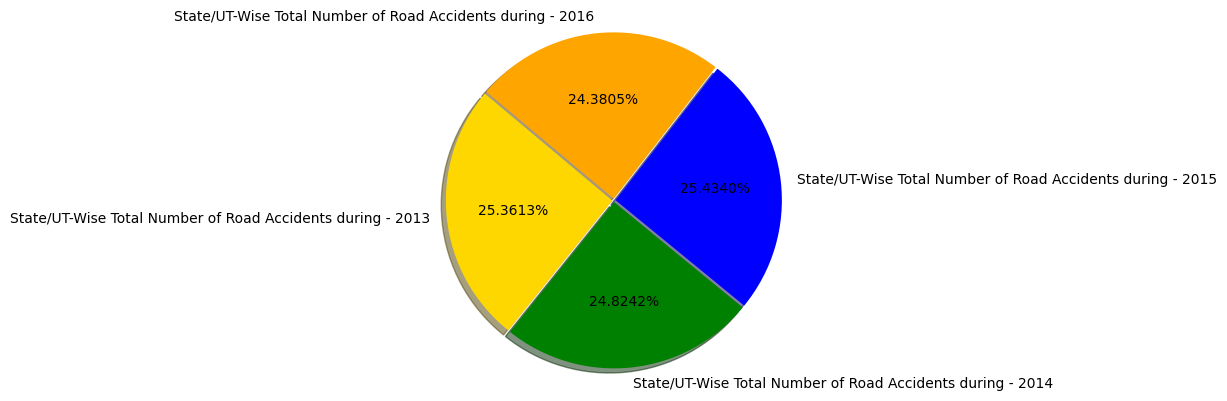

In [ ]:
labels = 'State/UT-Wise Total Number of Road Accidents during - 2013', 'State/UT-Wise Total Number of Road Accidents during - 2014', 'State/UT-Wise Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [mean13, mean14, mean15, mean16]
colors = ['gold', 'green', 'blue', 'orange']
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 140)
plt.axis('equal')
plt.show()

It is clearly visible that, the percentage of road accidents are **almost constant during all years.**
It indicates that the government is making less efforts to prevent accidents by creating wider, good quality roads or creating new safety rules.

### Calculating mean of total number of accidents per lakh population over the years.

In [ ]:
acc13 = np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population in 2013 : {}".format(acc13))

Mean of accidents per lakh population in 2013 : 41.91111111111111


In [ ]:
acc14 = np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population in 2014 : {}".format(acc14))

Mean of accidents per lakh population in 2014 : 39.87777777777777


In [ ]:
acc15 = np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population in 2015 : {}".format(acc15))

Mean of accidents per lakh population in 2015 : 40.83333333333332


In [ ]:
acc16 = np.mean(df['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population in 2016 : {}".format(acc16))

Mean of accidents per lakh population in 2016 : 39.63611111111111


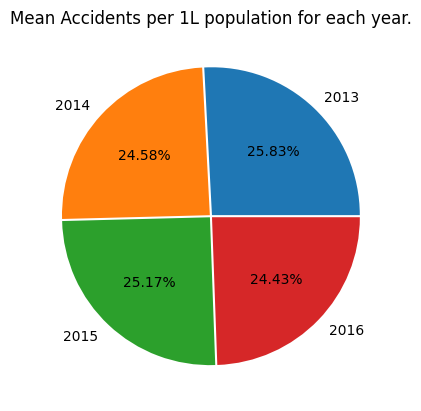

In [ ]:
labels = ('2013','2014','2015','2016')
explode = (0.01,0.01,0.01,0.01)
performance = [acc13, acc14, acc15, acc16]
plt.pie(performance, labels = labels, autopct = '%.2f%%', center = (0,0), explode = explode )
plt.title("Mean Accidents per 1L population for each year.")
plt.show()

A similar rate is obtained as previous.


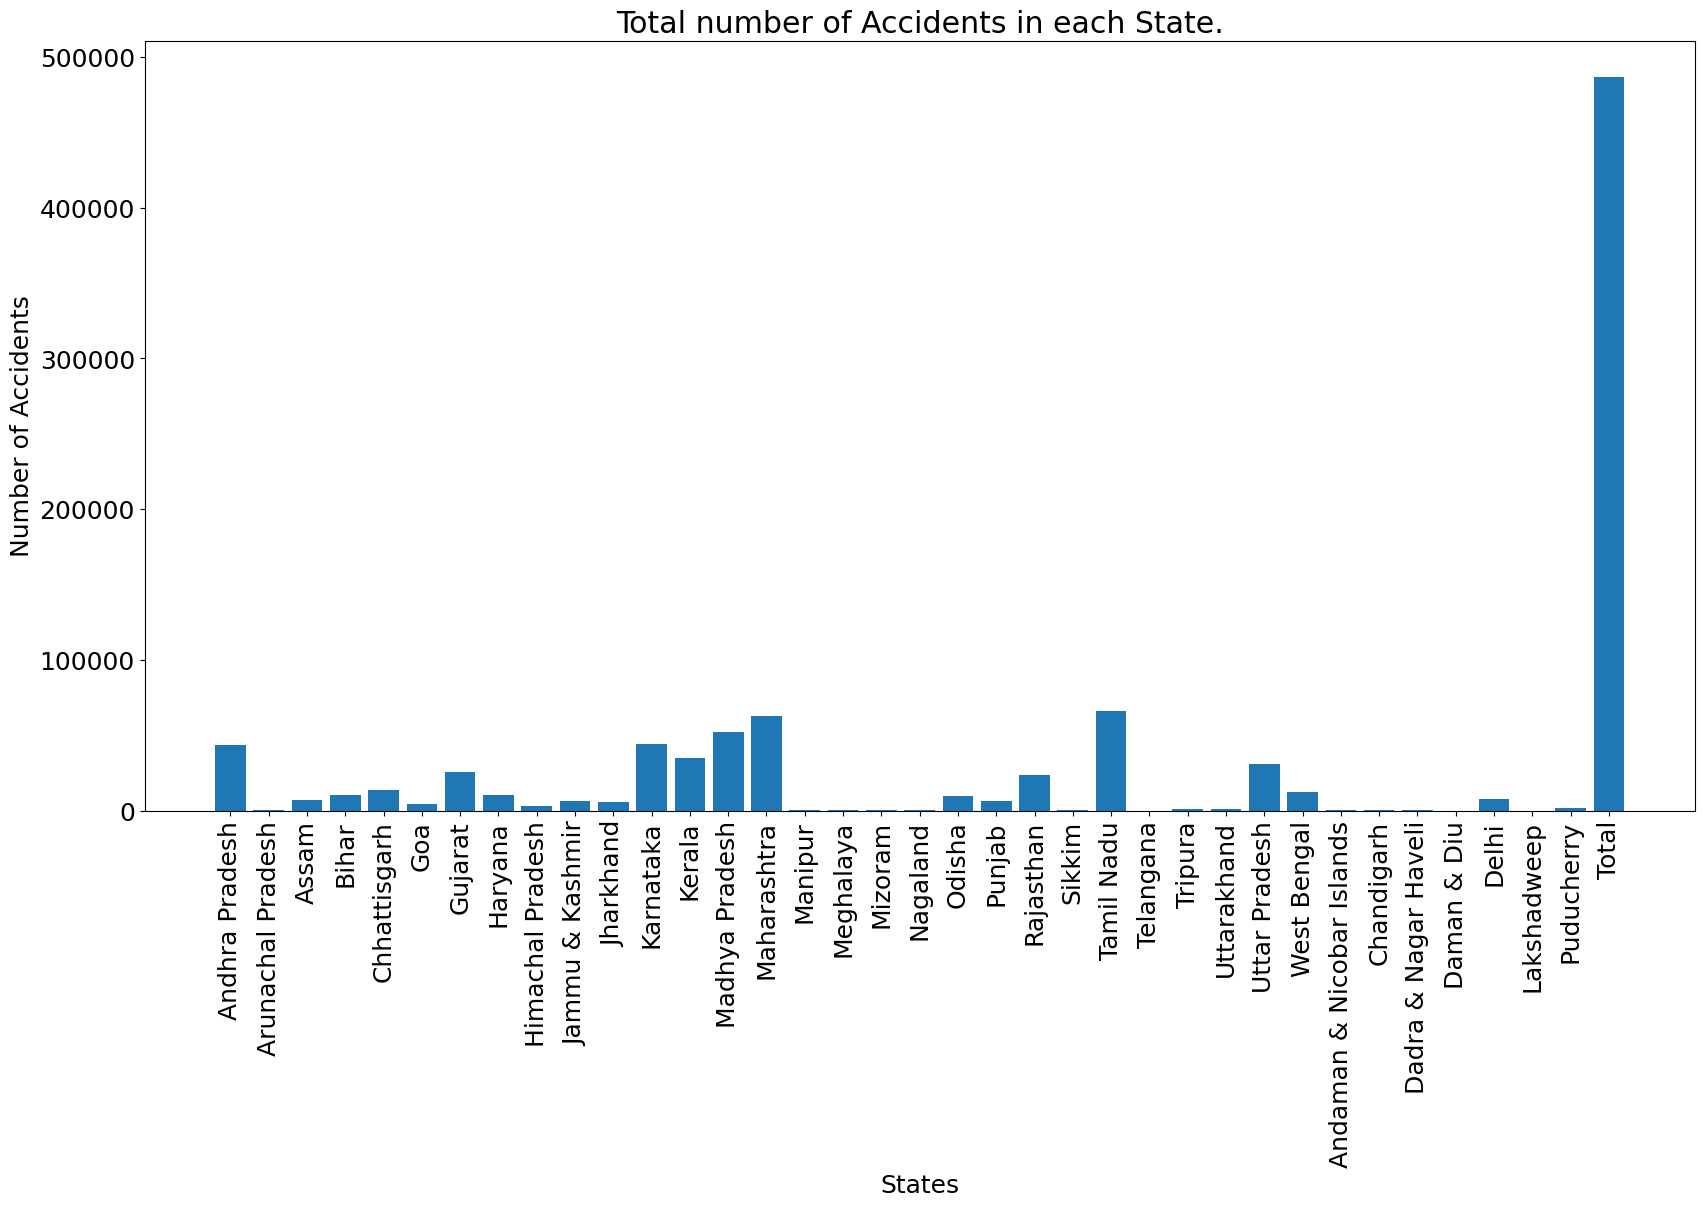

In [ ]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
y = df['State/UT-Wise Total Number of Road Accidents during - 2013']
yd = df['States/UTs']
p =df['States/UTs'].nunique()
d = np.linspace(1,p,p)   # refer notes
plt.bar(d, y, align = 'center')
plt.xticks(d, yd, rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Total number of Accidents in each State.')
plt.show()

**Maharashtra** and **Tamil Nadu** have the highest number of accidents. Further investigation needs to be done to understand the case.
**Arunachal, Manipur, Meghalaya, Mizoram, Nagaland, Tripura** have the least number of accidents. They surprisingly all belong to the **north-eastern area.**


#### linspace()
y = linspace(x1,x2,n) generates n points. The spacing between the points is (x2-x1)/(n-1).

linspace is similar to the colon operator, “:”, but gives direct control over the number of points and always includes the endpoints. “lin” in the name “linspace” refers to generating linearly spaced values as opposed to the sibling function logspace, which generates logarithmically spaced values.

In [ ]:
min13 = np.min(df['Total Number of Accidents Per Lakh Population - 2013'])
max13 = np.max(df['Total Number of Accidents Per Lakh Population - 2013'])

In [ ]:
min14 = np.min(df['Total Number of Accidents Per Lakh Population - 2014'])
max14 = np.max(df['Total Number of Accidents Per Lakh Population - 2014'])

In [ ]:
min15 = np.min(df['Total Number of Accidents Per Lakh Population - 2015'])
max15 = np.max(df['Total Number of Accidents Per Lakh Population - 2015'])

In [ ]:
min16 = np.min(df['Total Number of Accidents Per Lakh Population - 2016'])
max16 = np.max(df['Total Number of Accidents Per Lakh Population - 2016'])

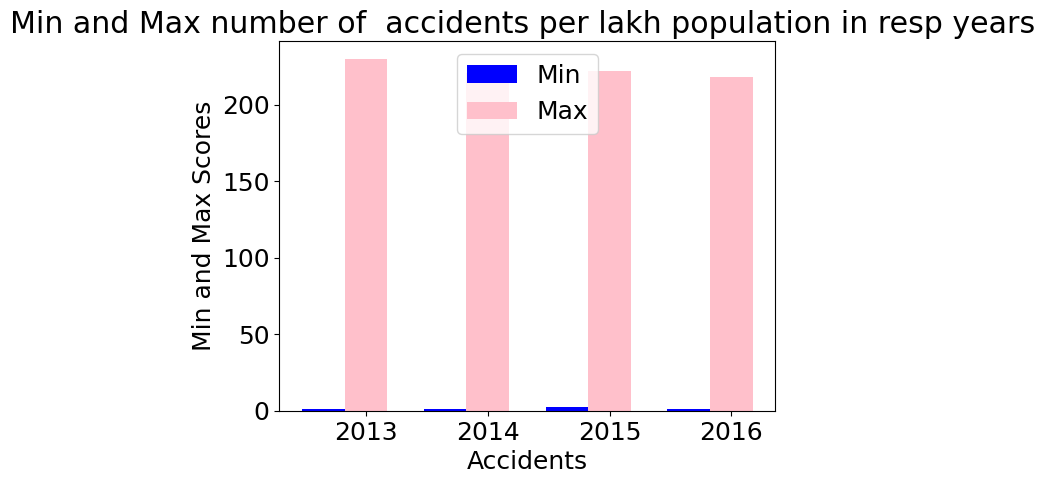

In [ ]:
n = 4
minx = (min13, min14, min15, min16)
maxx = (max13, max14, max15, max16)
index = np.arange(n)
bar_width = 0.35

r1 = plt.bar(index, minx, bar_width, align = 'center', color = 'b', label = 'Min')

r2 = plt.bar(index + bar_width, maxx, bar_width, align = 'center', color ='pink', label = 'Max')

plt.xlabel("Accidents")
plt.ylabel("Min and Max Scores")
plt.title("Min and Max number of  accidents per lakh population in resp years ")
plt.xticks(index + bar_width,('2013','2014','2015','2016'))
plt.legend(loc = 'upper center')
plt.show()

***
## DF1 :
This dataset shows the number of **offenders** and **victims** who died according to gender as well the as the total deaths.

In [ ]:
df1.head(2)

States/UTs  Year                            CrimeHead  \
0  Andhra Pradesh  2014                  Truck/Lorry (Total)   
1  Andhra Pradesh  2014  Truck/Lorry - Normal Goods Carriers   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678

In [ ]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [ ]:
meanOffMale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))

In [ ]:
meanOffFemale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))

In [ ]:
meanOffTrans = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))
meanOffTrans, meanOffMale, meanOffFemale

(0.0, 251.59251559251558, 21.717255717255718)

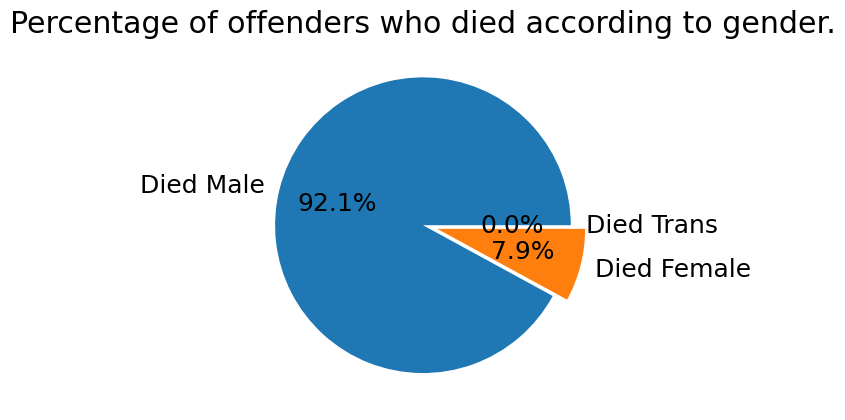

In [ ]:
sizes = [meanOffMale, meanOffFemale, meanOffTrans]
labels = ['Died Male','Died Female', 'Died Trans']
explode = (0, 0.1, 0)
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.1f%%')
plt.title("Percentage of offenders who died according to gender.")
plt.show()

### Victims who died according to gender.

In [ ]:
meanVictMale = (np.mean(df1['Victims Died_Male']))

In [ ]:
meanVictFemale = (np.mean(df1['Victims Died_Female']))

In [ ]:
meanVictTrans = (np.mean(df1['Victims Died_Transgender']))
meanVictMale, meanVictFemale, meanVictTrans

(705.8731808731809, 138.59667359667358, 0.13513513513513514)

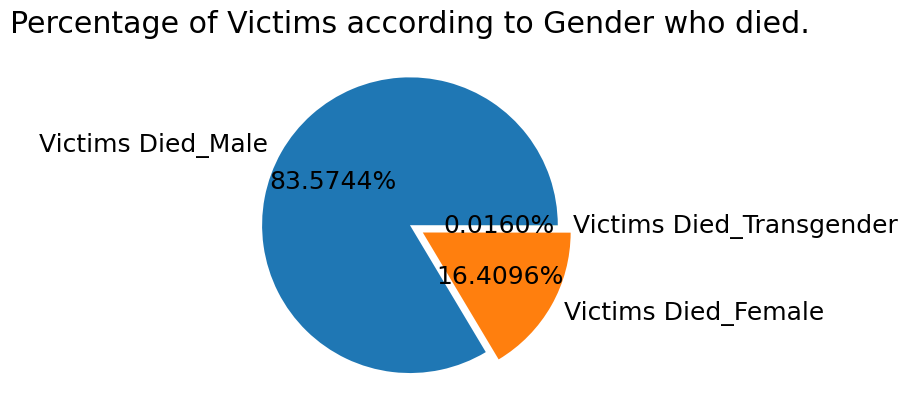

In [ ]:
sizes = [meanVictMale, meanVictFemale, meanVictTrans]
labels = 'Victims Died_Male', 'Victims Died_Female', 'Victims Died_Transgender'
explode =(0, 0.1, 0)

plt.pie(sizes, labels = labels, explode = explode, autopct = '%.4f%%')
plt.title("Percentage of Victims according to Gender who died.")
plt.show()

In [ ]:
meanOffTotal = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Total']))
meanVictTotal = (np.mean(df1['Victims Died_Total']))
meanOffTotal, meanVictTotal

(273.3097713097713, 844.6049896049896)

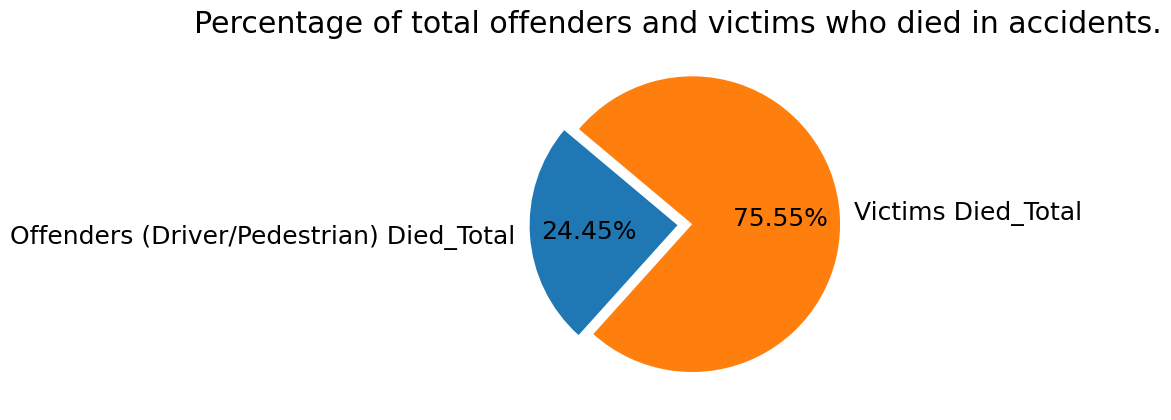

In [ ]:
labels = 'Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes = [meanOffTotal, meanVictTotal]
explode = (0,0.1)
plt.title("Percentage of total offenders and victims who died in accidents.")
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.2f%%', startangle = 140)
plt.show()

***

## DF2 -
This dataset is about the deaths that occured due to the **ignorance for safety accessories like Helmets, Belts** per gender.

In [ ]:
df2 = pd.read_csv(r'C:\Users\varun\Downloads\Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')
df2.head(2)

S. No.          State/ UT  Non-wearing of Helmet - Male  \
0      1     Andhra Pradesh                           459   
1      2  Arunachal Pradesh                            10   

   Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
0                              18                            477   
1                               4                             14   

   Non-wearing of seat belt - Male  Non-wearing of seat belt - Female  \
0                              222                                 15   
1                                0                                  0   

   Non-wearing of seat belt - Total  
0                               237  
1                                 0

In [ ]:
helmetMale = (np.mean(df2['Non-wearing of Helmet - Male']))
helmetFemale = (np.mean(df2['Non-wearing of Helmet - Female']))
helmetFemale, helmetMale

(82.10810810810811, 465.72972972972974)

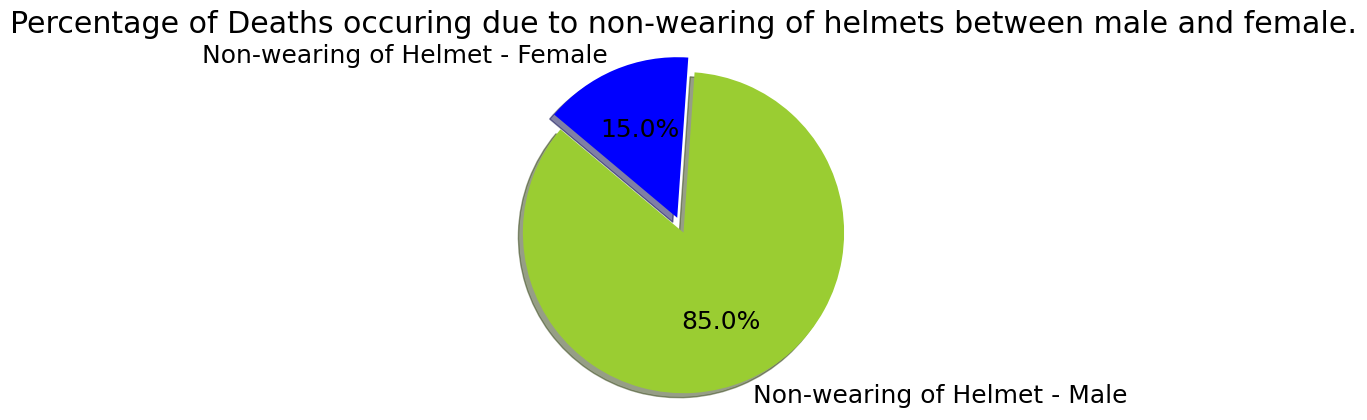

In [ ]:
labels = 'Non-wearing of Helmet - Male','Non-wearing of Helmet - Female'
sizes = [helmetMale, helmetFemale]
colors = ['yellowgreen', 'blue']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Deaths occuring due to non-wearing of helmets between male and female.")

plt.axis('equal')
plt.show()

In [ ]:
max1 = df2['Non-wearing of Helmet - Total'].max()
max2 = df2['Non-wearing of seat belt - Total'].max()
max1, max2

(10135, 5638)

***

## DF3
This data set shows the number of accidents happening per state from the year 2003 to 2016.


In [ ]:
df3 = pd.read_excel(r'C:\Users\varun\Downloads\accidents03-16.xls')
df3.head(2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


States/Uts    2003    2004    2005     2006     2007     2008  \
0     Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0   
1  Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0     90.0   

      2009     2010     2011     2012     2013  2014  2015  2016  
0  12676.0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851  
1    114.0    108.0     96.0     94.0    120.0    92   117   103

In [ ]:
df3.tail()

States/Uts     2003     2004     2005     2006      2007      2008  \
32  Daman & Diu     19.0     23.0     21.0     24.0      29.0      29.0   
33        Delhi   1730.0   1846.0   1771.0   2129.0    2081.0    2015.0   
34  Lakshadweep      0.0      0.0      0.0      1.0       0.0       0.0   
35   Puducherry    182.0    176.0    224.0    209.0     242.0     207.0   
36    All India  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0   

        2009      2010      2011      2012      2013    2014    2015    2016  
32      32.0      30.0      33.0      26.0      30.0      15      38      32  
33    2272.0    2104.0    2007.0    1822.0    1778.0    1629    1582    1548  
34       1.0       0.0       0.0       NaN       0.0       0       0       1  
35     214.0     224.0     230.0     178.0     223.0     145     229     235  
36  110993.0  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

In [ ]:
df3['States/Uts']

0                Andhra Pradesh
1             Arunachal Pradesh
2                         Assam
3                         Bihar
4                  Chhattisgarh
5                           Goa
6                       Gujarat
7                       Haryana
8              Himachal Pradesh
9               Jammu & Kashmir
10                    Jharkhand
11                    Karnataka
12                       Kerala
13               Madhya Pradesh
14                  Maharashtra
15                      Manipur
16                    Meghalaya
17                      Mizoram
18                     Nagaland
19                       Odisha
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
29    Andaman & Nicobar Islands
30                   Chandigarh
31      

In [ ]:
df8 = pd.DataFrame(columns = ['Year','Count'])

In [ ]:
df8['Year'] = df3[df3['States/Uts'] == 'All India'].columns[1:]

In [ ]:
df8 = df3[df3['States/Uts'] == "All India"]
df9 = df8.T

In [ ]:
df9.to_csv(r'C:\Users\varun\Downloads\accidentRate.csv')

<Figure size 2000x1000 with 0 Axes>

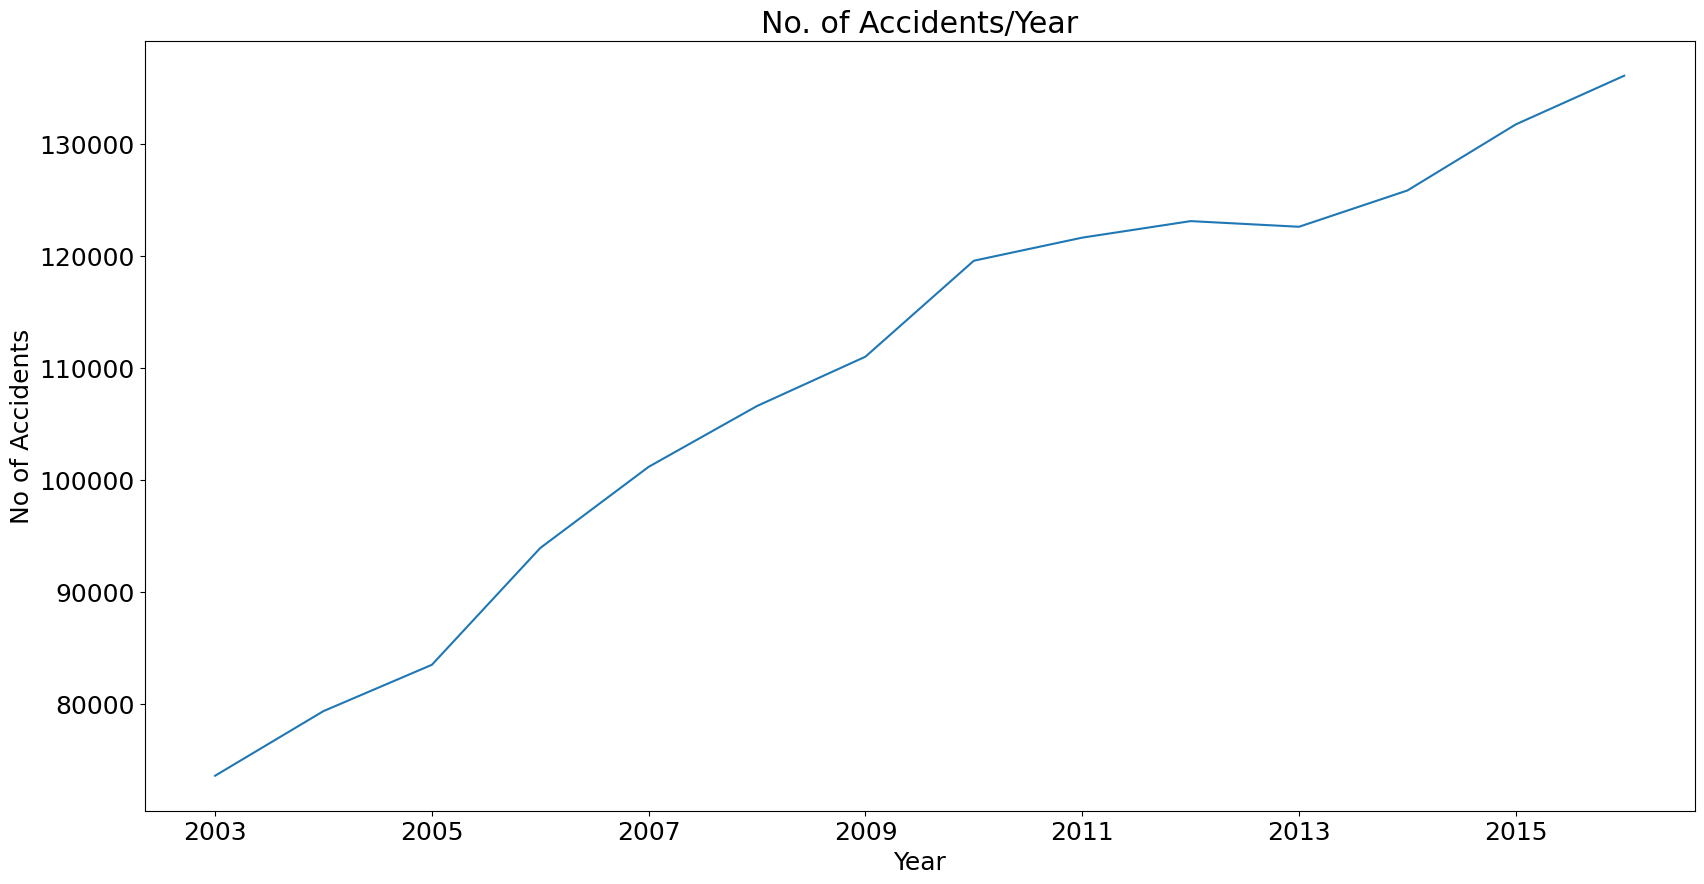

In [ ]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 18})

df9.iloc[1:].plot(figsize = (20,10), legend =  False)
plt.xlabel("Year")
plt.ylabel("No of Accidents")
plt.title("No. of Accidents/Year")
plt.show()

***
## DF4  
This data set contains number of **accidents/deaths/injuries occuring as per number of lanes.**

In [ ]:
df4=pd.read_csv(r'C:\Users\varun\Downloads\laneAccidents.csv')
df4.head(2)

S.No           State/UT  Single Lane - Accident - 2014  \
0    1     Andhra Pradesh                         8634.0   
1    2  Arunachal Pradesh                           90.0   

   Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
0                                    16.473750                       2958.0   
1                                     6.504173                         60.0   

   Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
0                                   5.643891                       13541.0   
1                                   4.336115                         152.0   

   Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
0                                   25.836350                      10327.0   
1                                   10.984826                        115.0   

   Two Lanes - Accident - 2014 per 1L people  ...  \
0                                  19.704009  ...   
1                                   8.310888  ...   

   3 Lanes or more w.o Median - Killed - 2014 per 1L people  \
0                                           0.755572          
1                                           0.000000          

   3 Lanes or more w.o Median - Injured - 2014  \
0                                       1199.0   
1                                          0.0   

   3 Lanes or more w.o Median - Injured - 2014 per 1L people  \
0                                           2.287703           
1                                           0.000000           

   4 Lanes with Median - Accident - 2014  \
0                                 4291.0   
1                                    0.0   

   4 Lanes with Median - Accident - 2014 per 1L people  \
0                                           8.187267     
1                                           0.000000     

   4 Lanes with Median - Killed - 2014  \
0                               1560.0   
1                                  0.0   

   4 Lanes with Median - Killed - 2014 per 1L people  \
0                                           2.976494   
1                                           0.000000   

   4 Lanes with Median - Injured - 2014  \
0                                5069.0   
1                                   0.0   

   4 Lanes with Median - Injured - 2014 per 1L people  Population  
0                                           9.671698     52410653  
1                                           0.000000      1383727  

[2 rows x 27 columns]

In [ ]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [ ]:
df4.dropna(axis = 0, how ='any', inplace = True)

*Number of **ACCIDENTS** for 1,2,3,4 lanes per 1L population.*

In [ ]:
singleLaneAcc = df4['Single Lane - Accident - 2014 per 1L people']
twoLaneAcc = df4['Two Lanes - Accident - 2014 per 1L people']
threeLaneAcc = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']
fourLaneAcc = df4['4 Lanes with Median - Accident - 2014 per 1L people']

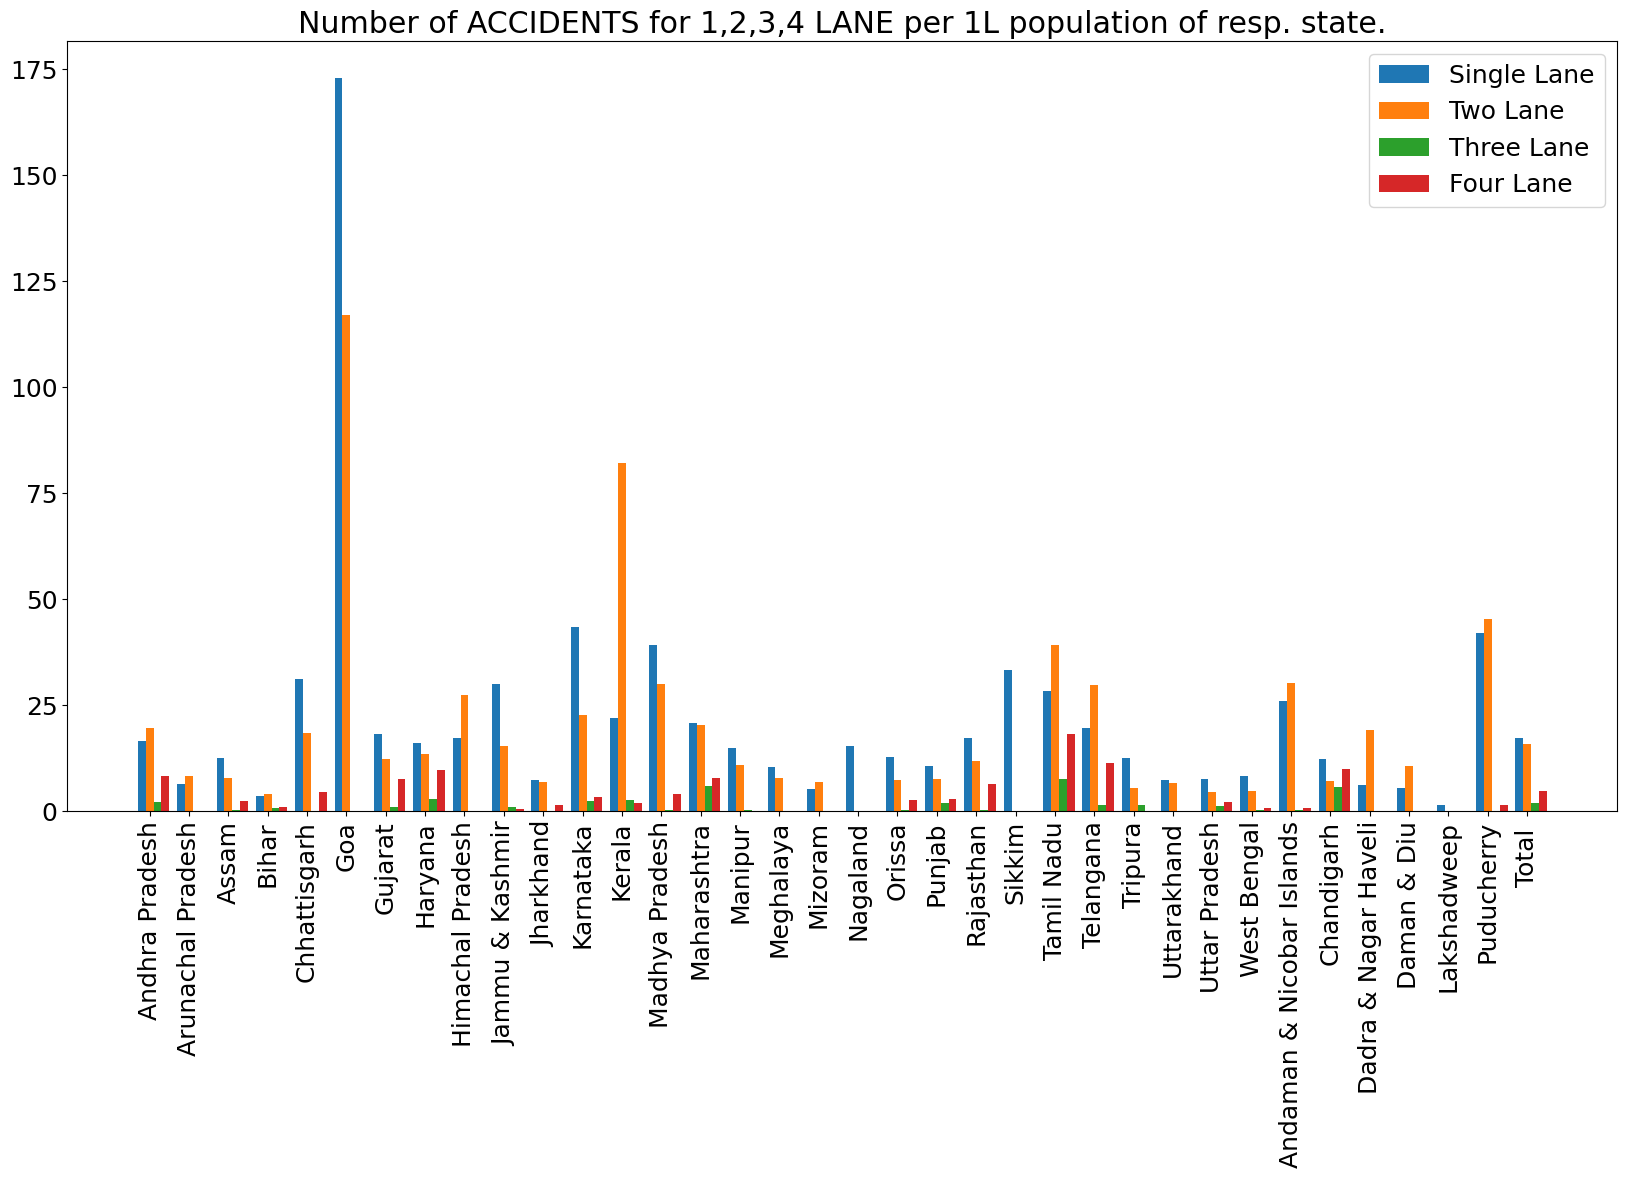

In [ ]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT-0.2, singleLaneAcc, label='Single Lane', width = 0.2,
        align = 'center')
plt.bar(UT, twoLaneAcc, label = 'Two Lane', width = 0.2,
        align = 'center')
plt.bar(UT+0.2, threeLaneAcc, label = 'Three Lane', width = 0.2,
        align = 'center')
plt.bar(UT+0.4, fourLaneAcc, label = 'Four Lane', width =0.2,
        align = 'center')

plt.xticks(UT, df4['State/UT'], rotation = 'vertical' )
plt.legend(loc = 'best')
plt.title("Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state.")
plt.show()

*Number of people **INJURED** for 1,2,3,4 number of lanes per 1L population.*


In [ ]:
singleInjured = df4['Single Lane - Injured - 2014 per 1L people']
twoInjured = df4['Two Lanes - Injured - 2014 per 1L people']
threeInjured = df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']
fourInjured = df4['4 Lanes with Median - Injured - 2014 per 1L people']

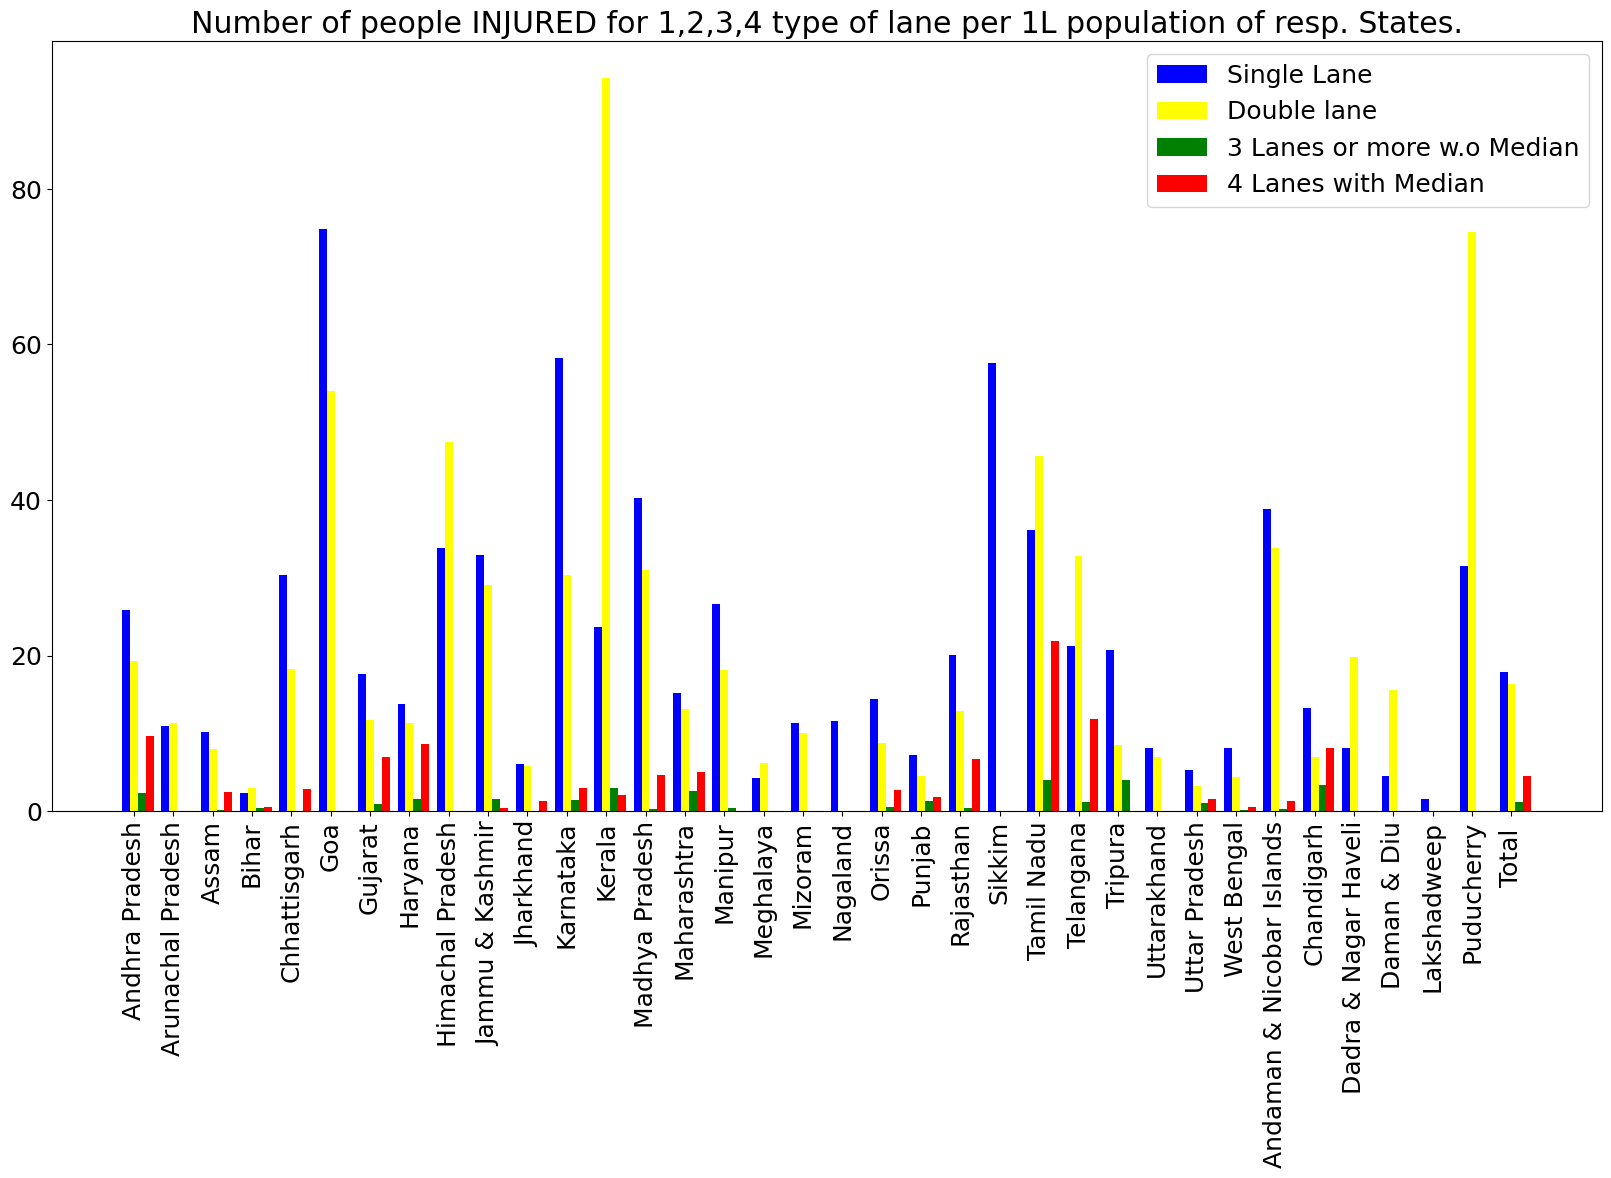

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, singleInjured, width=0.2, color='b',
        align='center',label='Single Lane')
plt.bar(UT, twoInjured, width=0.2, color='yellow',
        align='center',label='Double lane')
plt.bar(UT+0.2, threeInjured, width=0.2, color='g',
        align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4, fourInjured, width=0.2, color='red',
        align='center',label='4 Lanes with Median')

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. States.")
plt.legend(loc = "best")
plt.show()

*Number of people **KILLED** for 1,2,3,4 Lanes per 1L  population.*

In [ ]:
singleLaneKilled = df4['Single Lane - Killed - 2014 per 1L people']
twoLaneKilled = df4['Two Lanes - Killed - 2014 per 1L people']
threeLaneKilled = df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']
fourLaneKilled = df4['4 Lanes with Median - Killed - 2014 per 1L people']


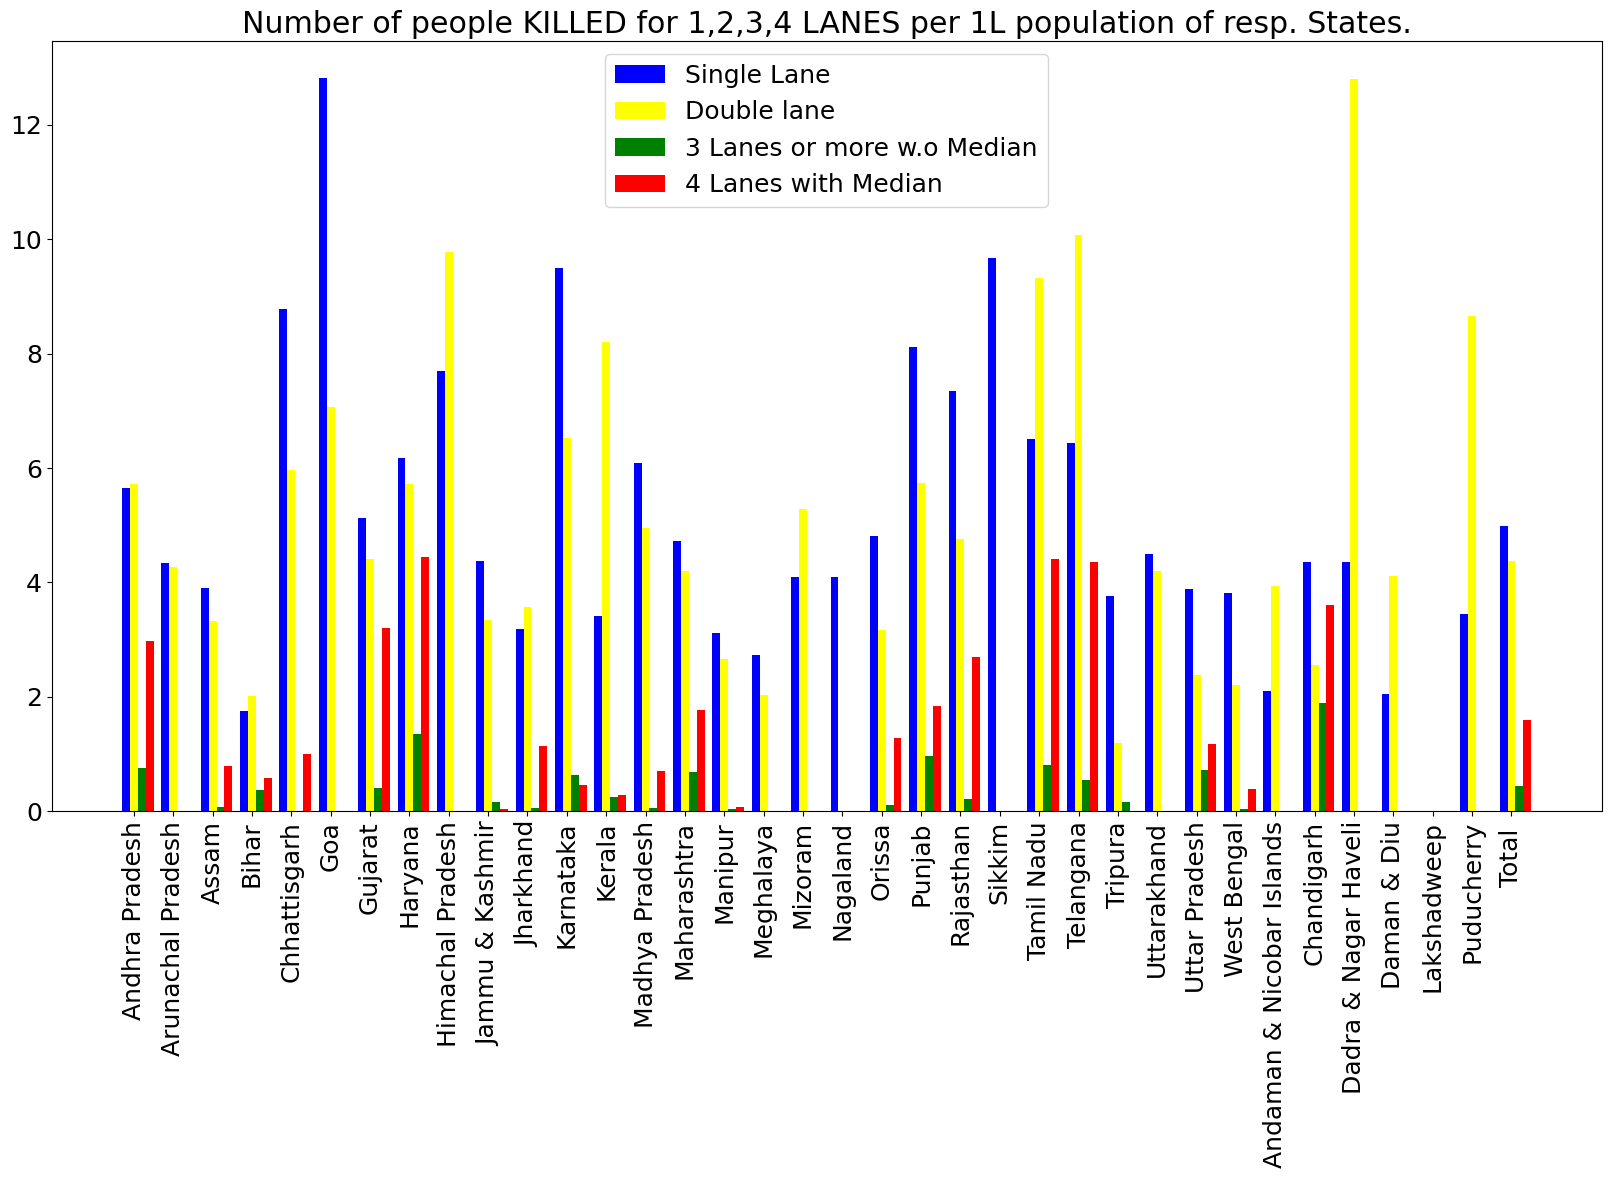

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, singleLaneKilled, width=0.2, color='b',
        align='center',label='Single Lane')
plt.bar(UT, twoLaneKilled, width=0.2, color='yellow',
        align='center',label='Double lane')
plt.bar(UT+0.2, threeLaneKilled, width=0.2, color='g',
        align='center',label='3 Lanes or more w.o Median')
plt.bar(UT+0.4, fourLaneKilled, width=0.2, color='red',
        align='center',label='4 Lanes with Median')

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of people KILLED for 1,2,3,4 LANES per 1L population of resp. States.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed on **SINGLE LANE** per 1L population.*

In [ ]:
singleLaneTotalInjured = df4['Single Lane - Injured - 2014 per 1L people']
singleLaneTotalKilled = df4['Single Lane - Killed - 2014 per 1L people']
singleLaneTotalAccidents = df4['Single Lane - Accident - 2014 per 1L people']

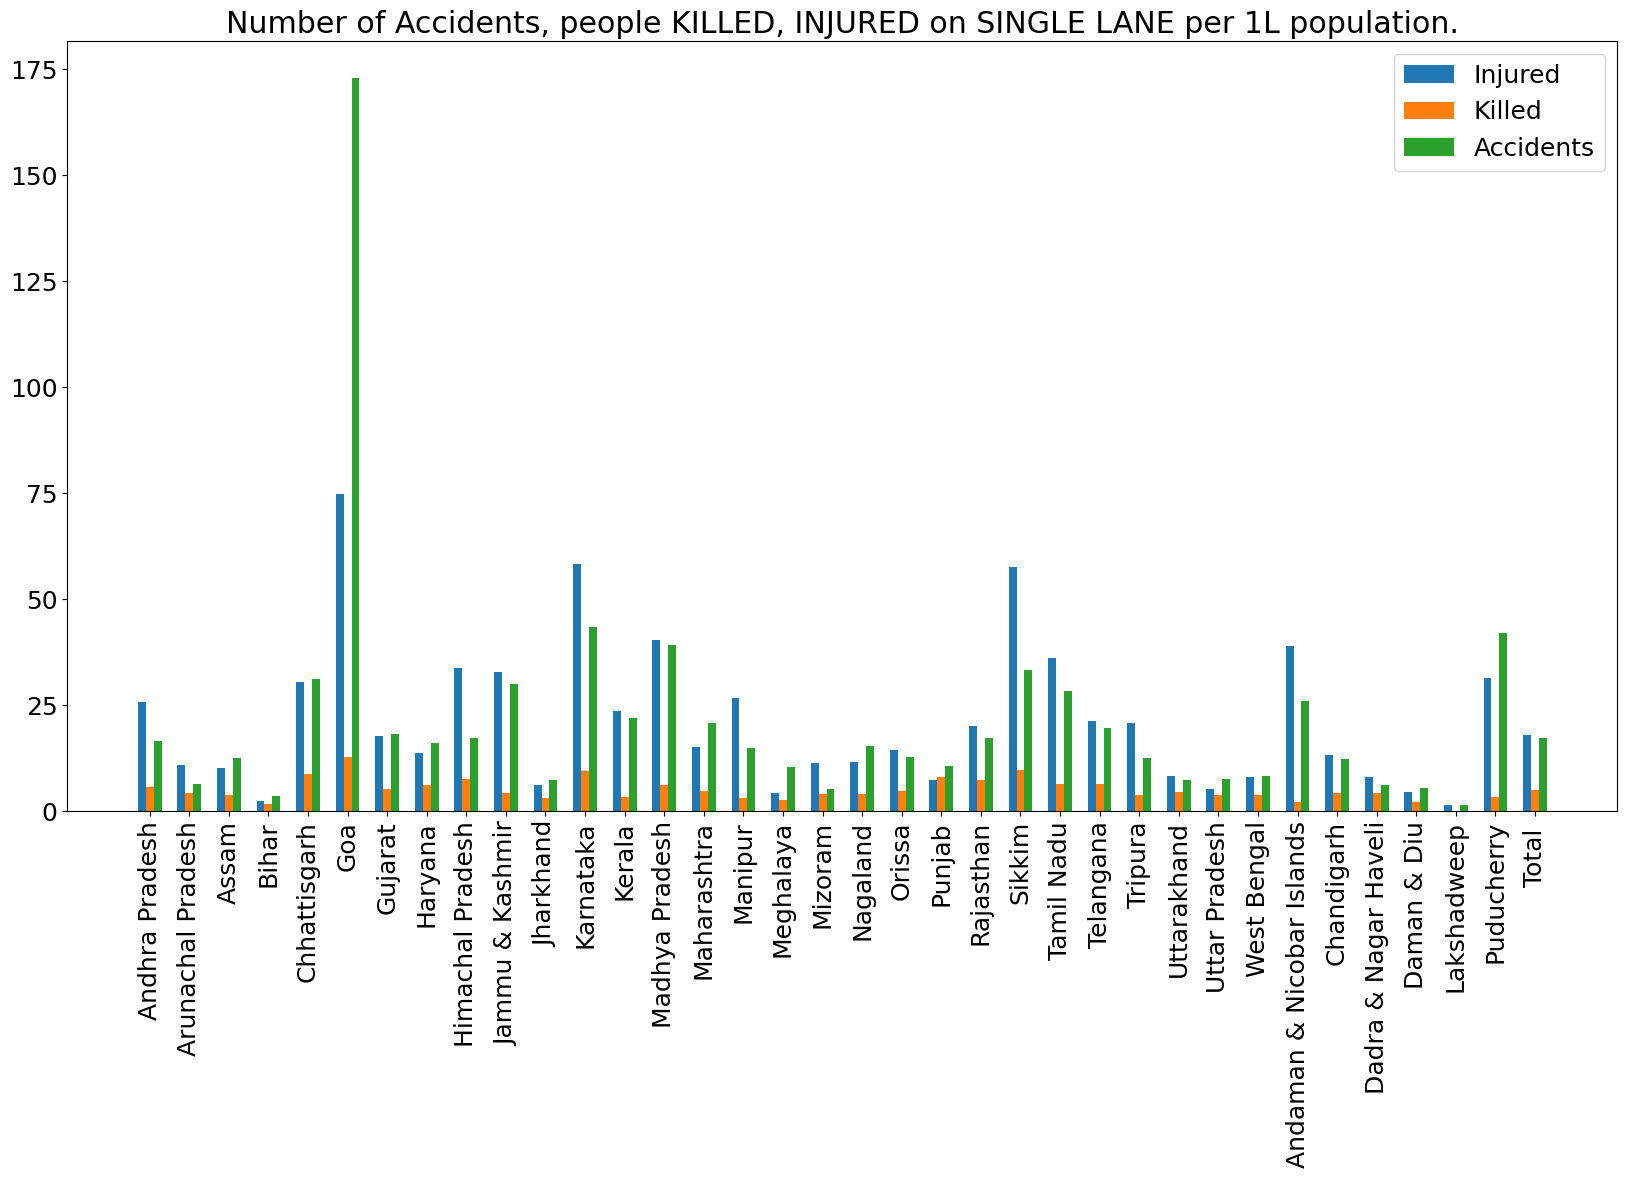

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, singleLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, singleLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, singleLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of Accidents, people KILLED, INJURED on SINGLE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed on **DOUBLE LANE** per 1L population.*

In [ ]:
twoLaneTotalInjured = df4['Two Lanes - Injured - 2014 per 1L people']
twoLaneTotalKilled = df4['Two Lanes - Killed - 2014 per 1L people']
twoLaneTotalAccidents = df4['Two Lanes - Accident - 2014 per 1L people']

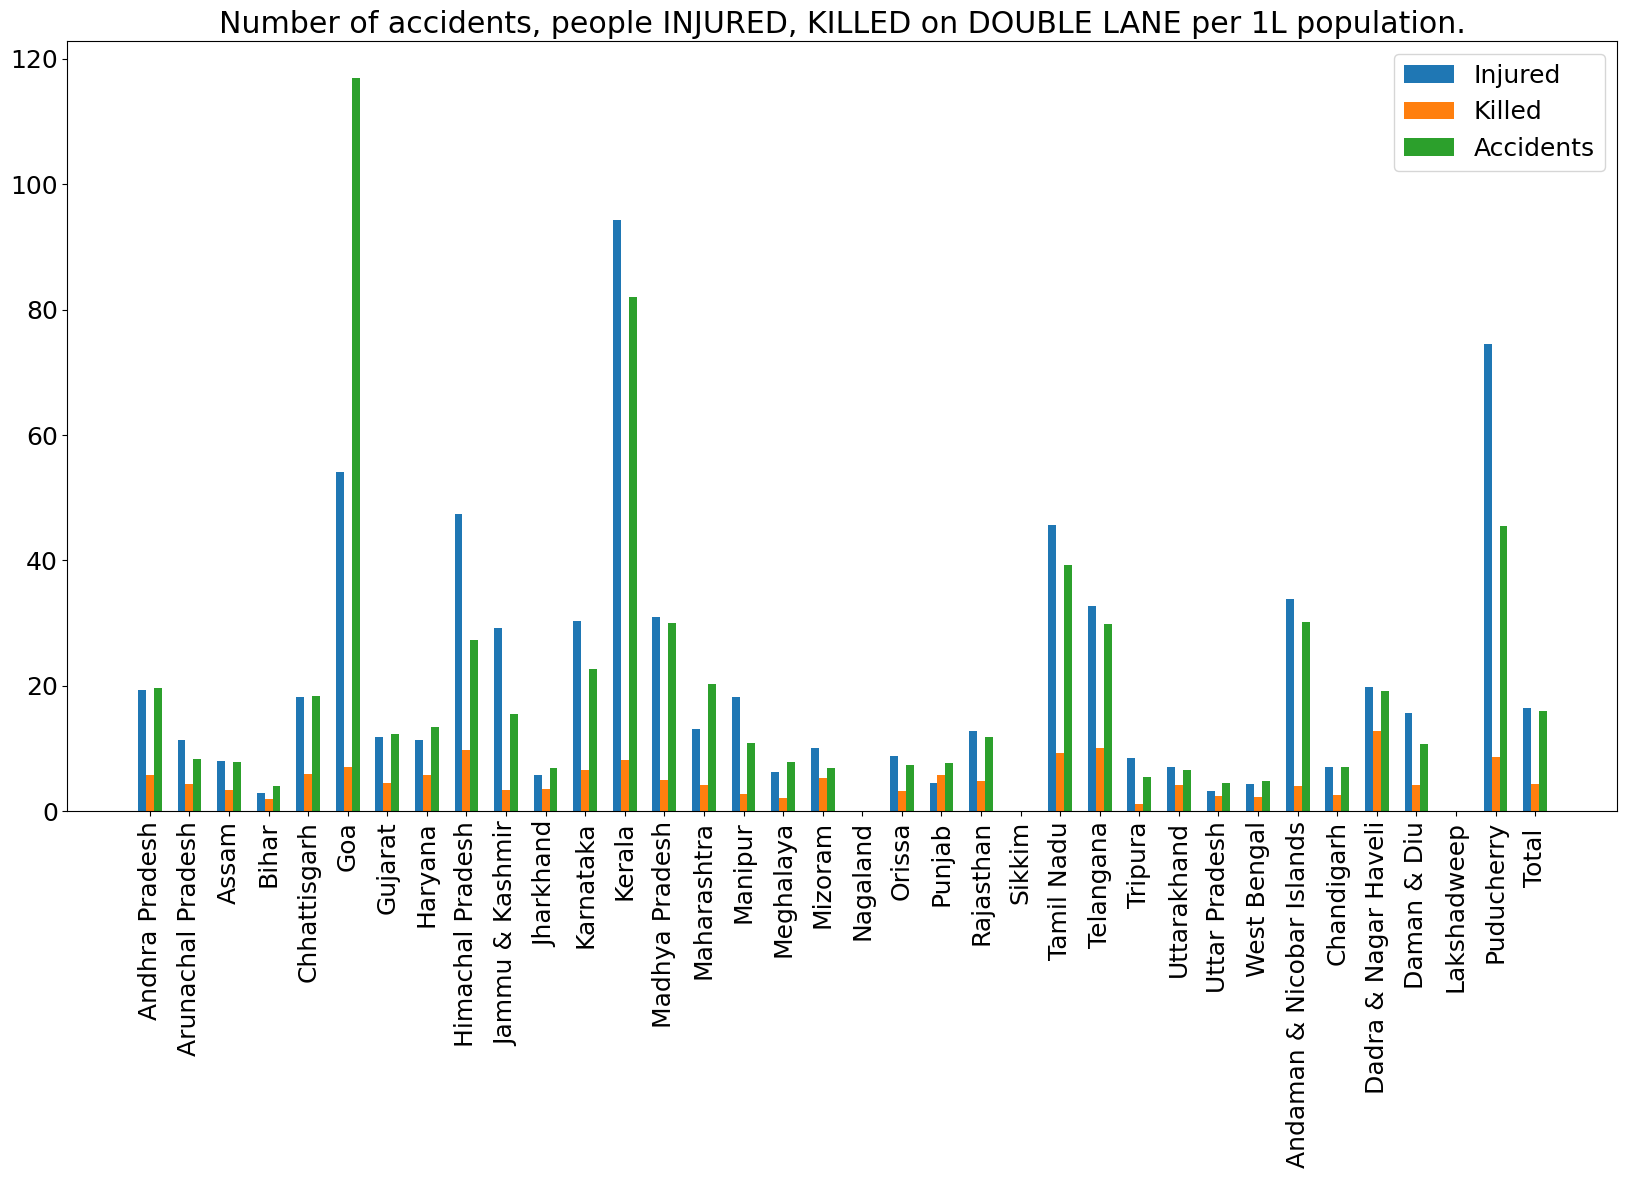

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, twoLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, twoLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, twoLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people injured, killed for **THREE LANE** per 1L population.*

In [ ]:
threeLaneTotalInjured = df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']
threeLaneTotalKilled = df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']
threeLaneTotalAccidents = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']

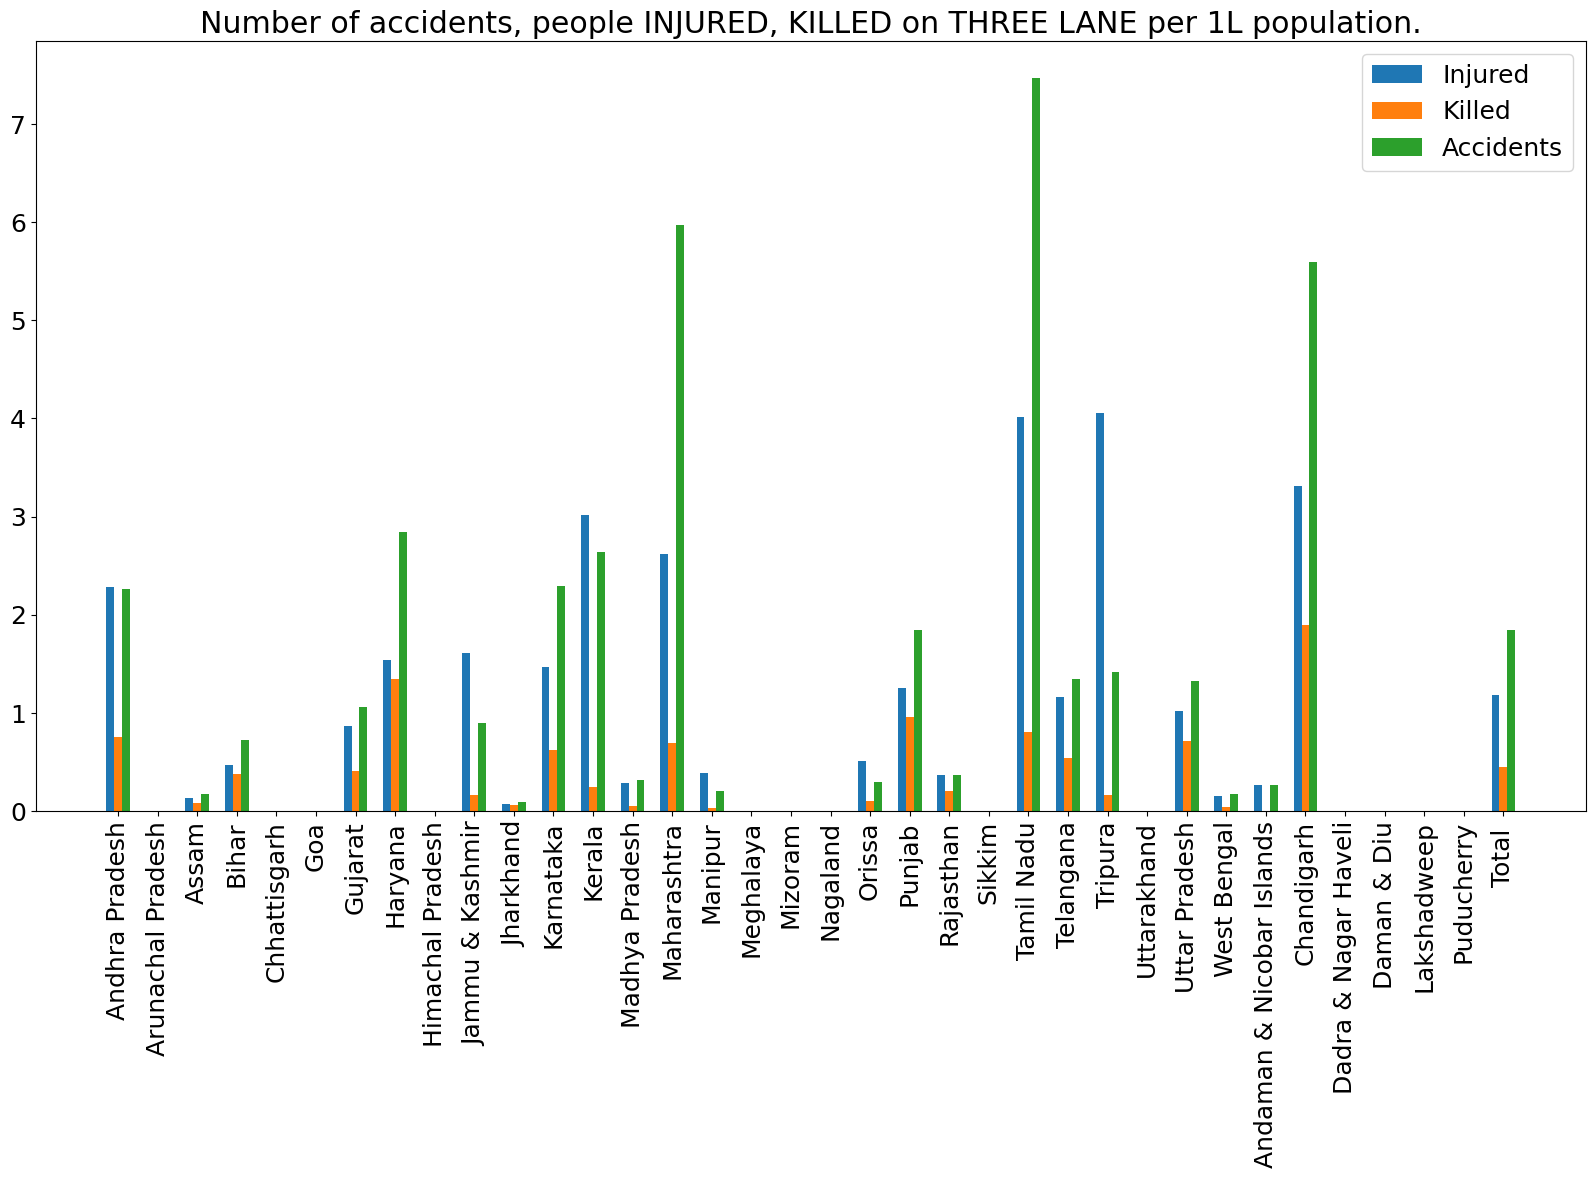

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, threeLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, threeLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, threeLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on THREE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people INJURED, KILLED on **FOUR LANE** per 1L population.*

In [ ]:
fourLaneTotalInjured = df4['4 Lanes with Median - Injured - 2014 per 1L people']
fourLaneTotalKilled = df4['4 Lanes with Median - Killed - 2014 per 1L people']
fourLaneTotalAccidents = df4['4 Lanes with Median - Accident - 2014 per 1L people']

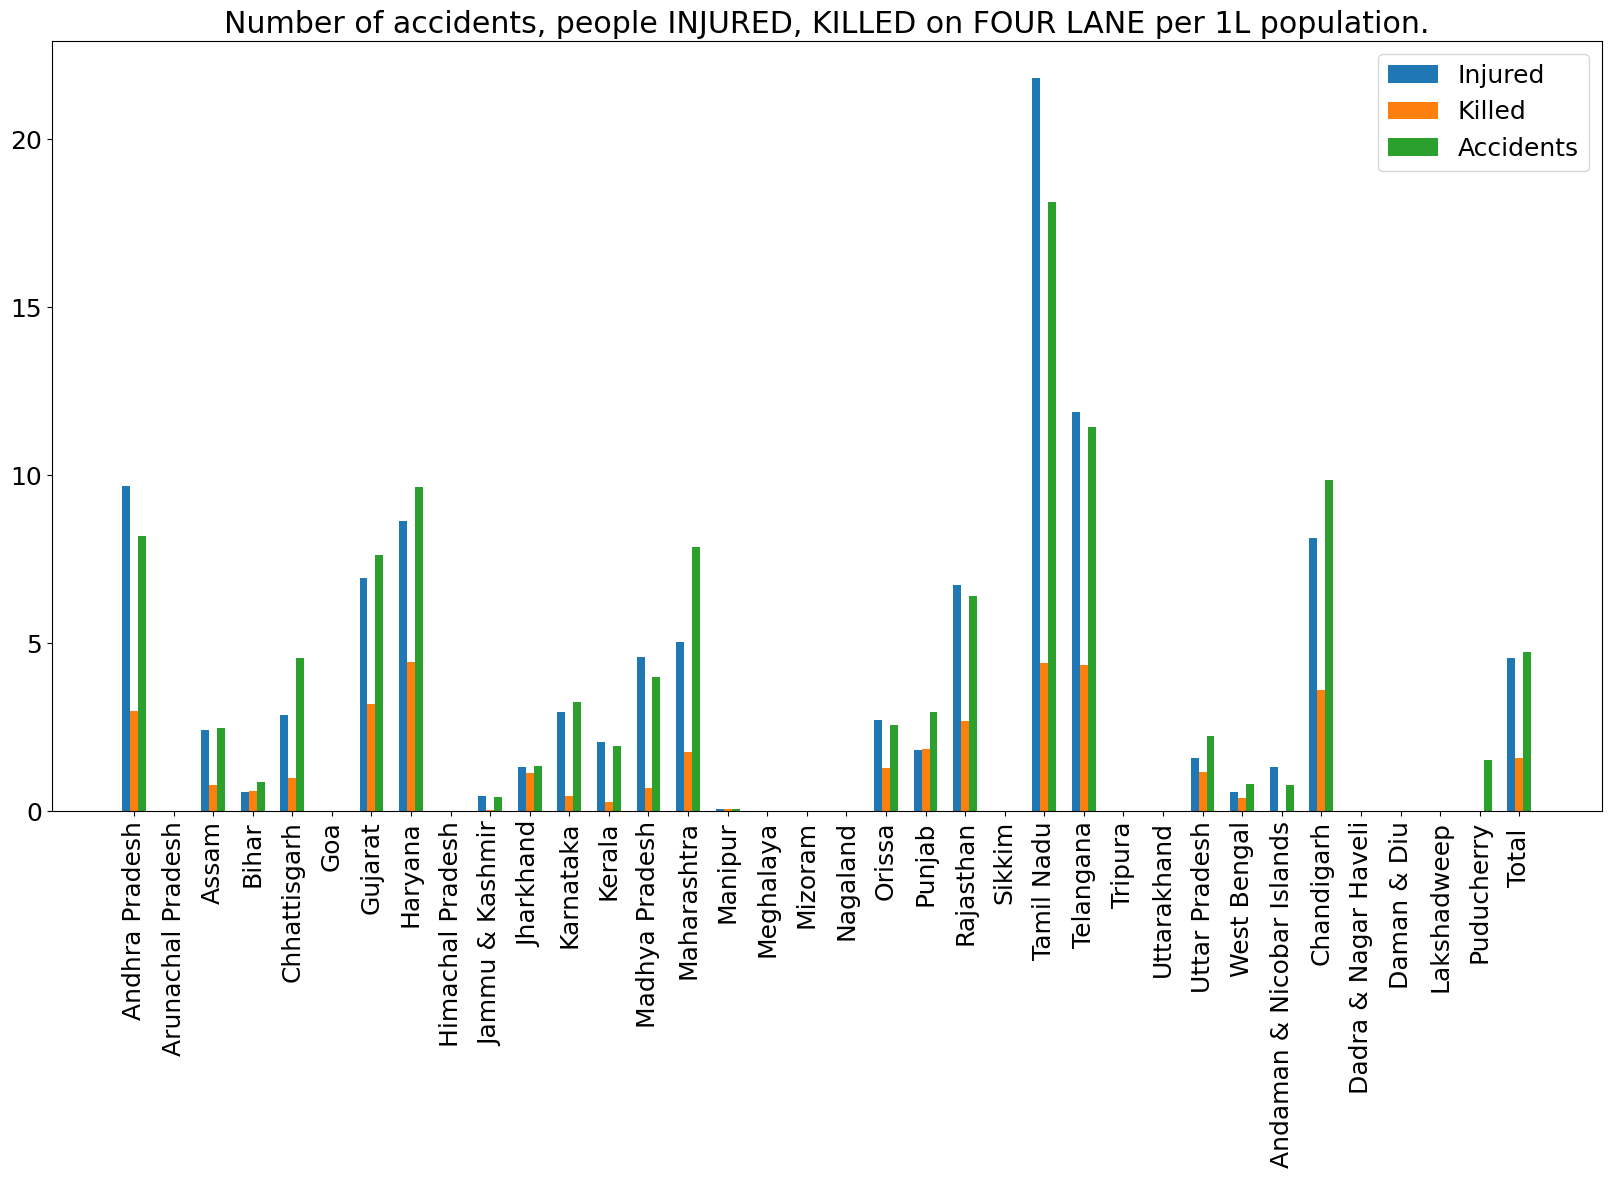

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, fourLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, fourLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, fourLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Total number of accidents, people INJURED, KILLED **irrespective of lanes** per 1L population per state*

In [ ]:
df4['Sum Total Number of Persons Killed - 2014 per 1L people']=df4['Single Lane - Killed - 2014 per 1L people']+df4['Two Lanes - Killed - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']+df4['4 Lanes with Median - Killed - 2014 per 1L people']
df4['Sum Total Number of Persons Injured - 2014 per 1L people']=df4['Single Lane - Injured - 2014 per 1L people']+df4['Two Lanes - Injured - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']+df4['4 Lanes with Median - Injured - 2014 per 1L people']
df4['Sum Total Road Accidents - 2014 per 1L people']=df4['Single Lane - Accident - 2014 per 1L people']+df4['Two Lanes - Accident - 2014 per 1L people']+df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']+df4['4 Lanes with Median - Accident - 2014 per 1L people']

totalKilled = df4['Sum Total Number of Persons Killed - 2014 per 1L people']
totalInjured = df4['Sum Total Number of Persons Injured - 2014 per 1L people']
totalAccidents = df4['Sum Total Road Accidents - 2014 per 1L people']

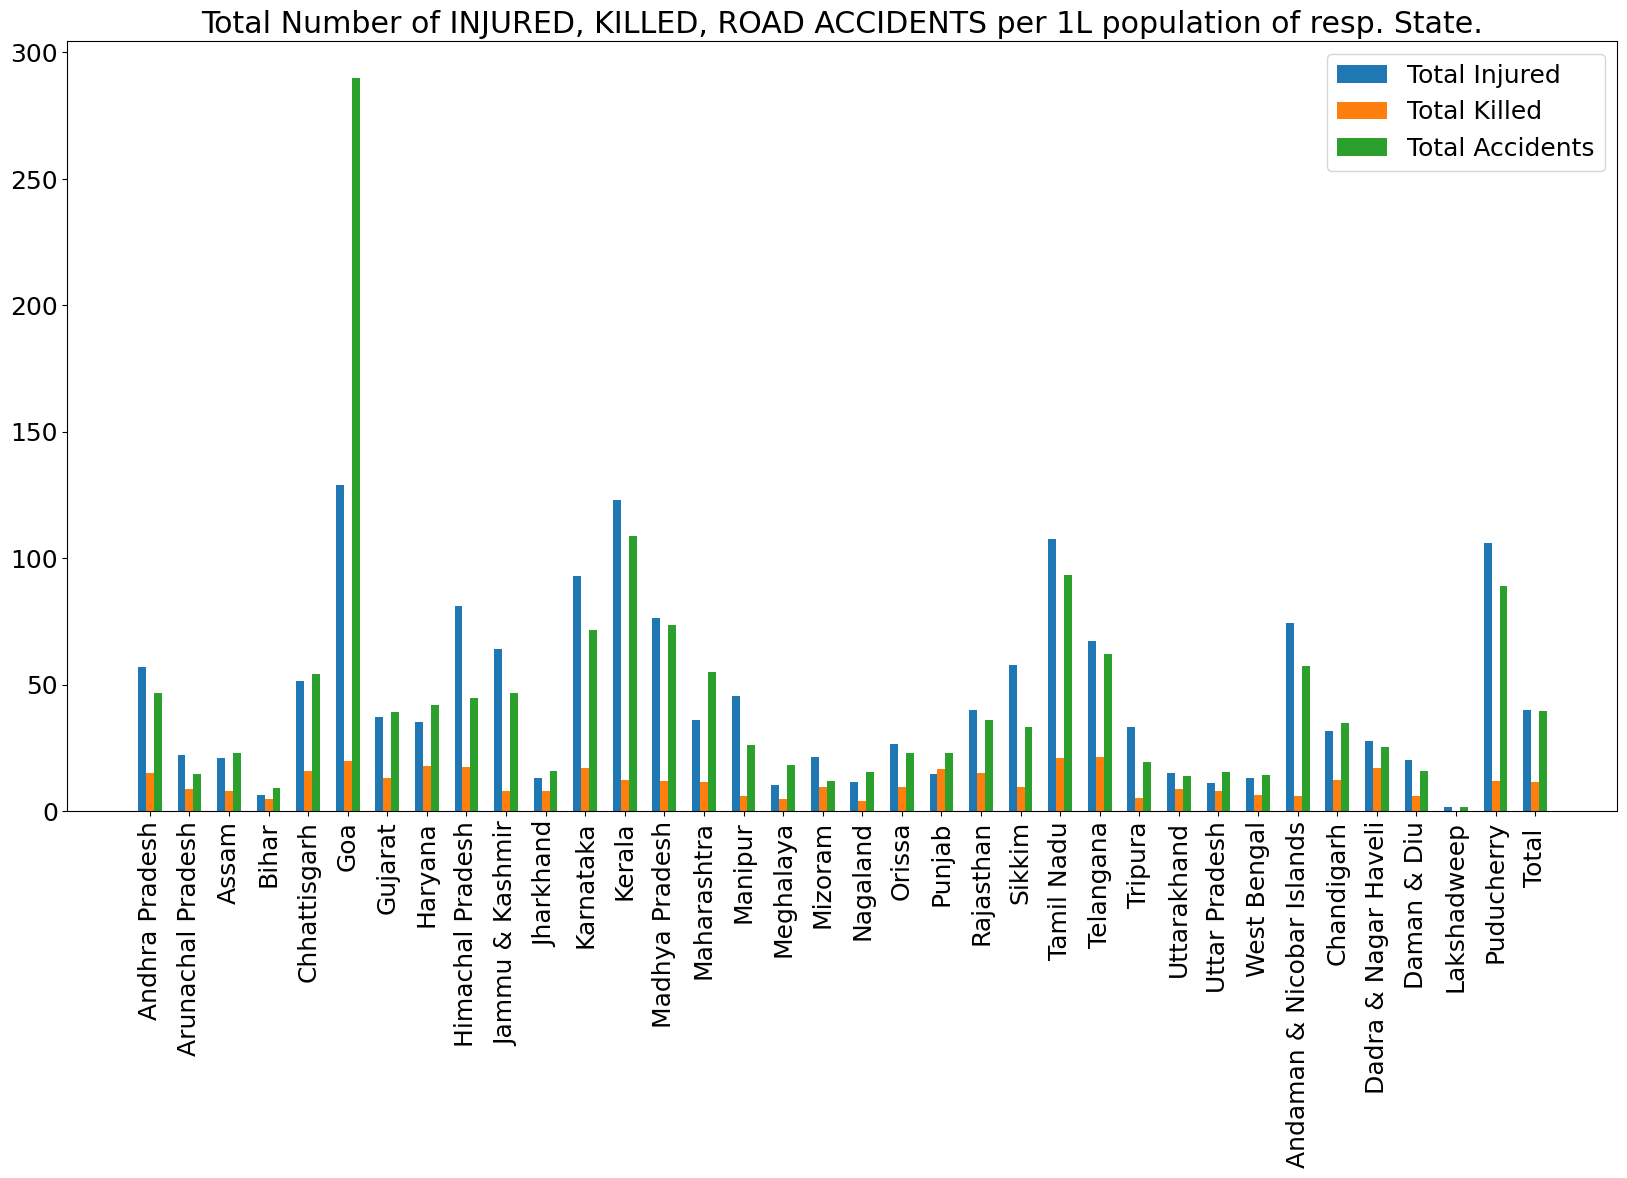

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2, totalInjured, width=0.2, align='center', label='Total Injured')
plt.bar(UT, totalKilled, width=0.2, align='center', label='Total Killed')
plt.bar(UT+0.2, totalAccidents, width=0.2, align='center', label="Total Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Total Number of INJURED, KILLED, ROAD ACCIDENTS per 1L population of resp. State.")
plt.legend(loc = "best")
plt.show()

Scatter plot showing **Total Sum of Accidents vs Killed for all  types of lanes for the accident (dots represent each state)**

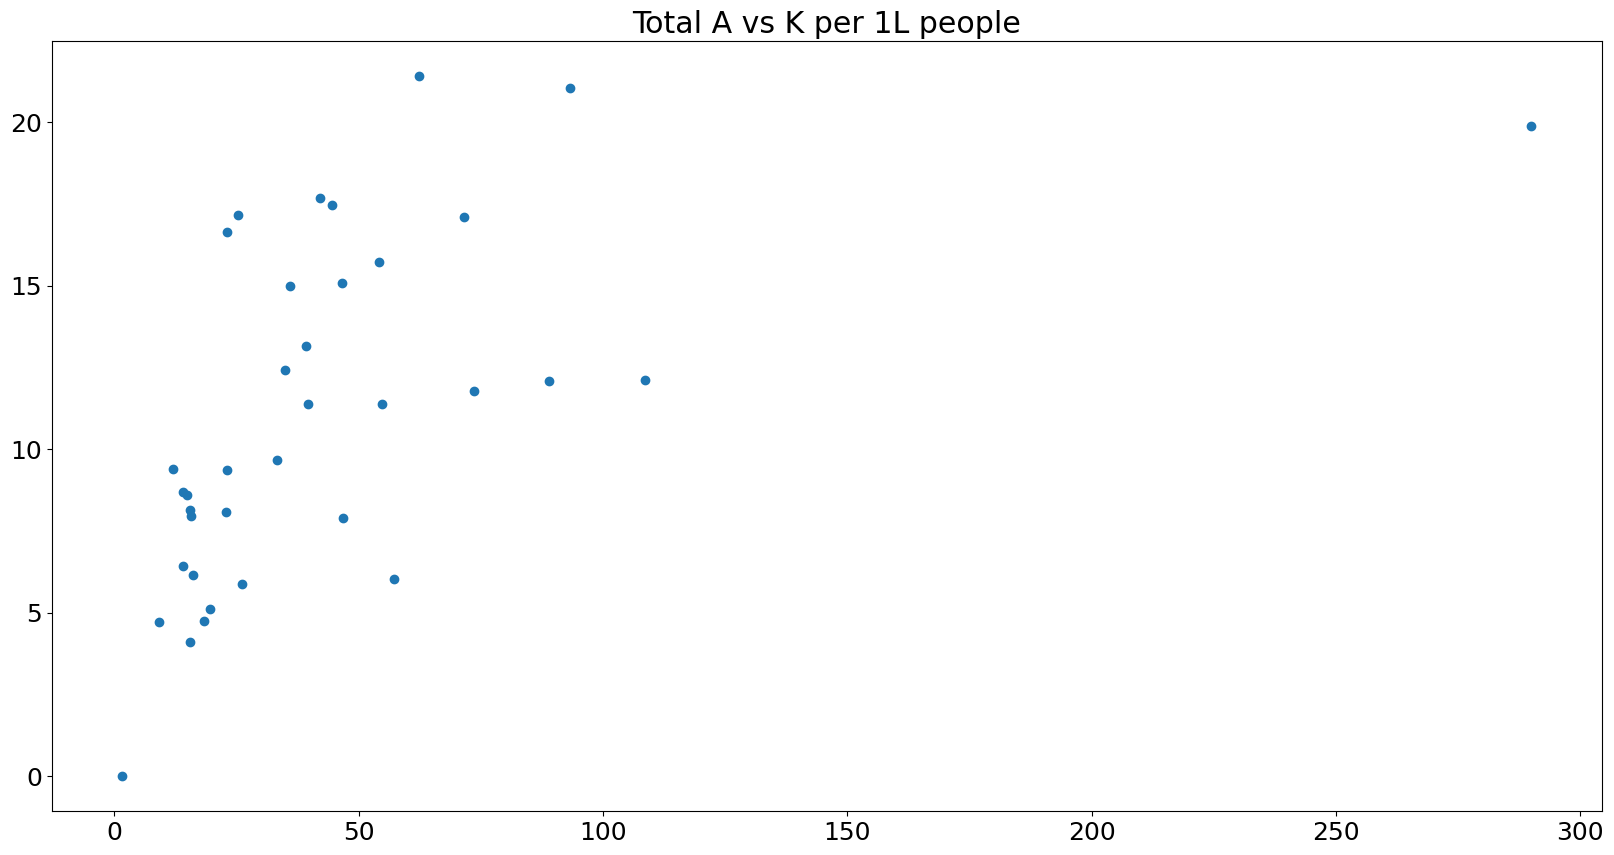

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.scatter(df4['Sum Total Road Accidents - 2014 per 1L people'],df4['Sum Total Number of Persons Killed - 2014 per 1L people'])
plt.title("Total A vs K per 1L people")
plt.show()

#### Scatter plot showing          *Total Sum of Accidents vs Injured for all  types of lanes for the accident* (dots represent each state)


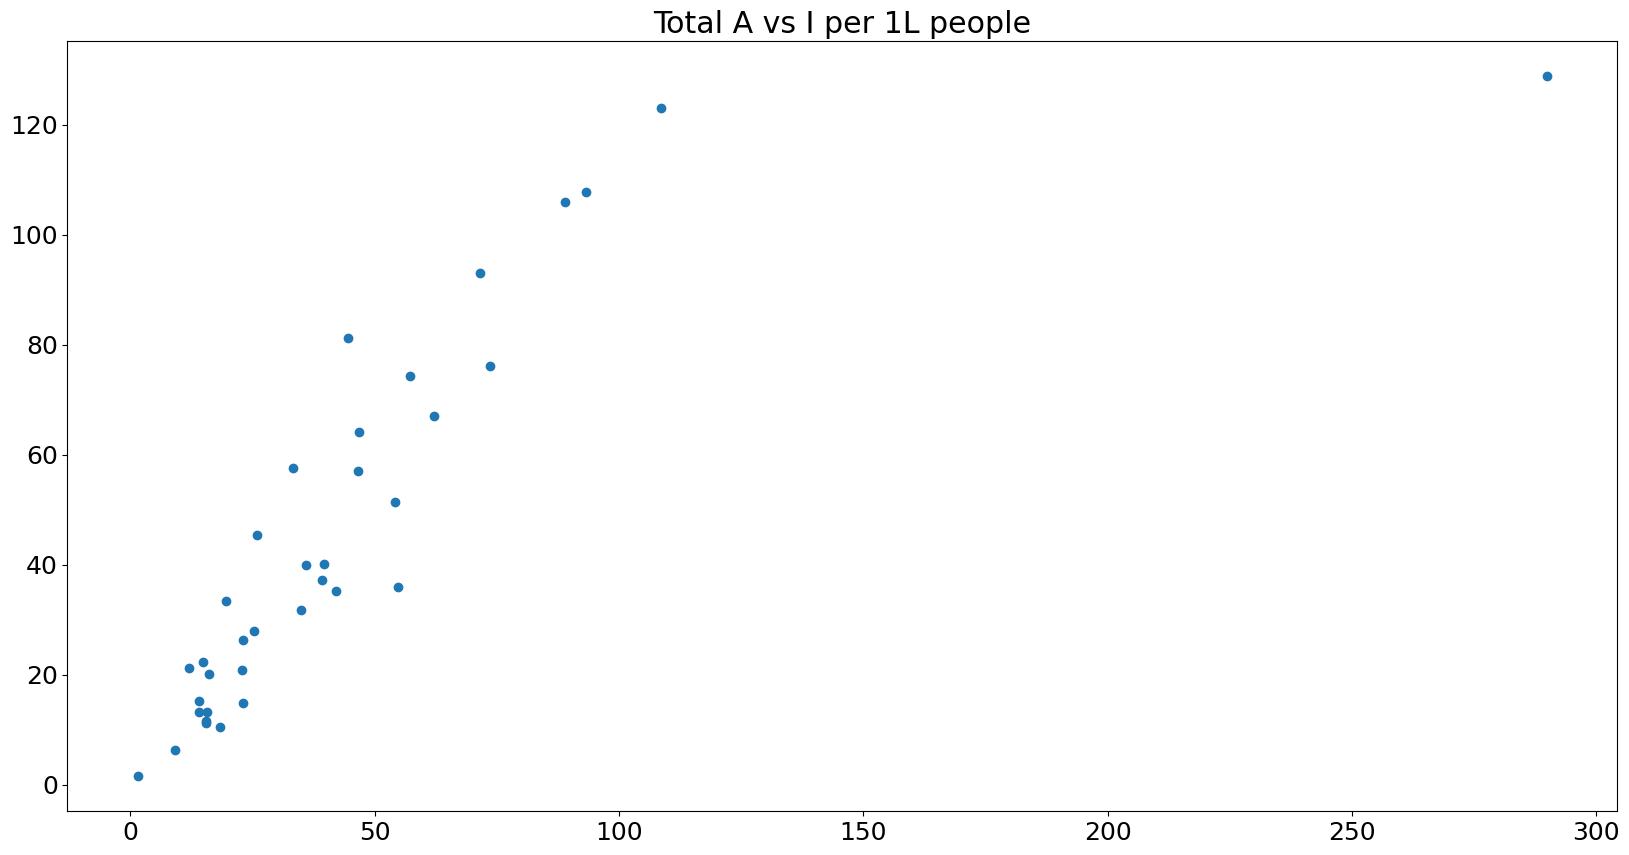

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.scatter(df4['Sum Total Road Accidents - 2014 per 1L people'],df4['Sum Total Number of Persons Injured - 2014 per 1L people'])
plt.title("Total A vs I per 1L people")
plt.show()

***
## DF5 -

This dataset states the count of accidents, deaths, injuries occured due to **various faults and reasons like Fault of Driver, weather condition, boulder, poor light etc.**

In [ ]:
df5 = pd.read_csv(r'C:\Users\varun\Downloads\reasonOfAccident.csv')
df5.head()

Sl. No         States/UTs  \
0      1     Andhra Pradesh   
1      2  Arunachal Pradesh   
2      3              Assam   
3      4              Bihar   
4      5       Chhattisgarh   

   Fault of Driver-Total No. of Road Accidents - 2014  \
0                                            21359.0    
1                                               30.0    
2                                             6895.0    
3                                             5008.0    
4                                             9108.0    

   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
0                                          40.753165                  
1                                           2.168058                  
2                                          22.095410                  
3                                           4.810784                  
4                                          35.654451                  

   Fault of Driver-Number of Persons-Killed - 2014  \
0                                             6743   
1                                               19   
2                                             2429   
3                                             2646   
4                                             2458   

   Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
0                                          12.865705               
1                                           1.373103               
2                                           7.783865               
3                                           2.541800               
4                                           9.622161               

   Fault of Driver-Number of Persons-Injured - 2014  \
0                                           26287.0   
1                                              30.0   
2                                            6281.0   
3                                            3374.0   
4                                            8710.0   

   Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
0                                          50.155834                
1                                           2.168058                
2                                          20.127813                
3                                           3.241131                
4                                          34.096428                

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
0                                              288.0                      
1                                               20.0                      
2                                                2.0                      
3                                              608.0                      
4                                              726.0                      

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
0                                           0.549507                                    
1                                           1.445372                                    
2                                           0.006409                                    
3                                           0.584057                                    
4                                           2.842021                                    

   ...  Falling of boulders-Number of Persons-Killed - 2014 per 1L people  \
0  ...                                           0.001908                   
1  ...                                           0.000000                   
2  ...                                           0.000000                   
3  ...                                           0.042267                   
4  ...                                           0.027402                   

   Falling of boulders-Number of Persons-Injured - 2014  \
0                                               12.0     

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Sl. No                                                                                 37 non-null     object 
 1   States/UTs                                                                             37 non-null     object 
 2   Fault of Driver-Total No. of Road Accidents - 2014                                     36 non-null     float64
 3   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                       36 non-null     float64
 4   Fault of Driver-Number of Persons-Killed - 2014                                        37 non-null     int64  
 5   Fault of Driver-Number of Persons-Killed - 2014 per 1L people                   

*Reasons for death due to Accidents :*
- Driver
- Other Driver's
- Pedestrian
- Condition of Vehicle
- Road Condition
- Weather Condition
- Passenger
- Poor Light
- Boulders
- Other Causes

#### IMPORTANT ERROR -

*plt.bar valueerror: shape mismatch: objects cannot be broadcast to a single shape.*


[The solution.](https://stackoverflow.com/questions/48962594/unable-to-plot-double-bar-bar-plot-using-pyplot-for-ndarray).

In [ ]:
driverFault = df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']
otherDriversFault = df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']
pedestrianFault = df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']
conditionOfVehicleFault = df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']
roadConditionFault = df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']
weatherConditionFault = df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']
passengerFault = df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']
poorLightFault = df5['Poor light-Number of Persons-Killed - 2014 per 1L people']
bouldersFault = df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']
otherCauses = df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']

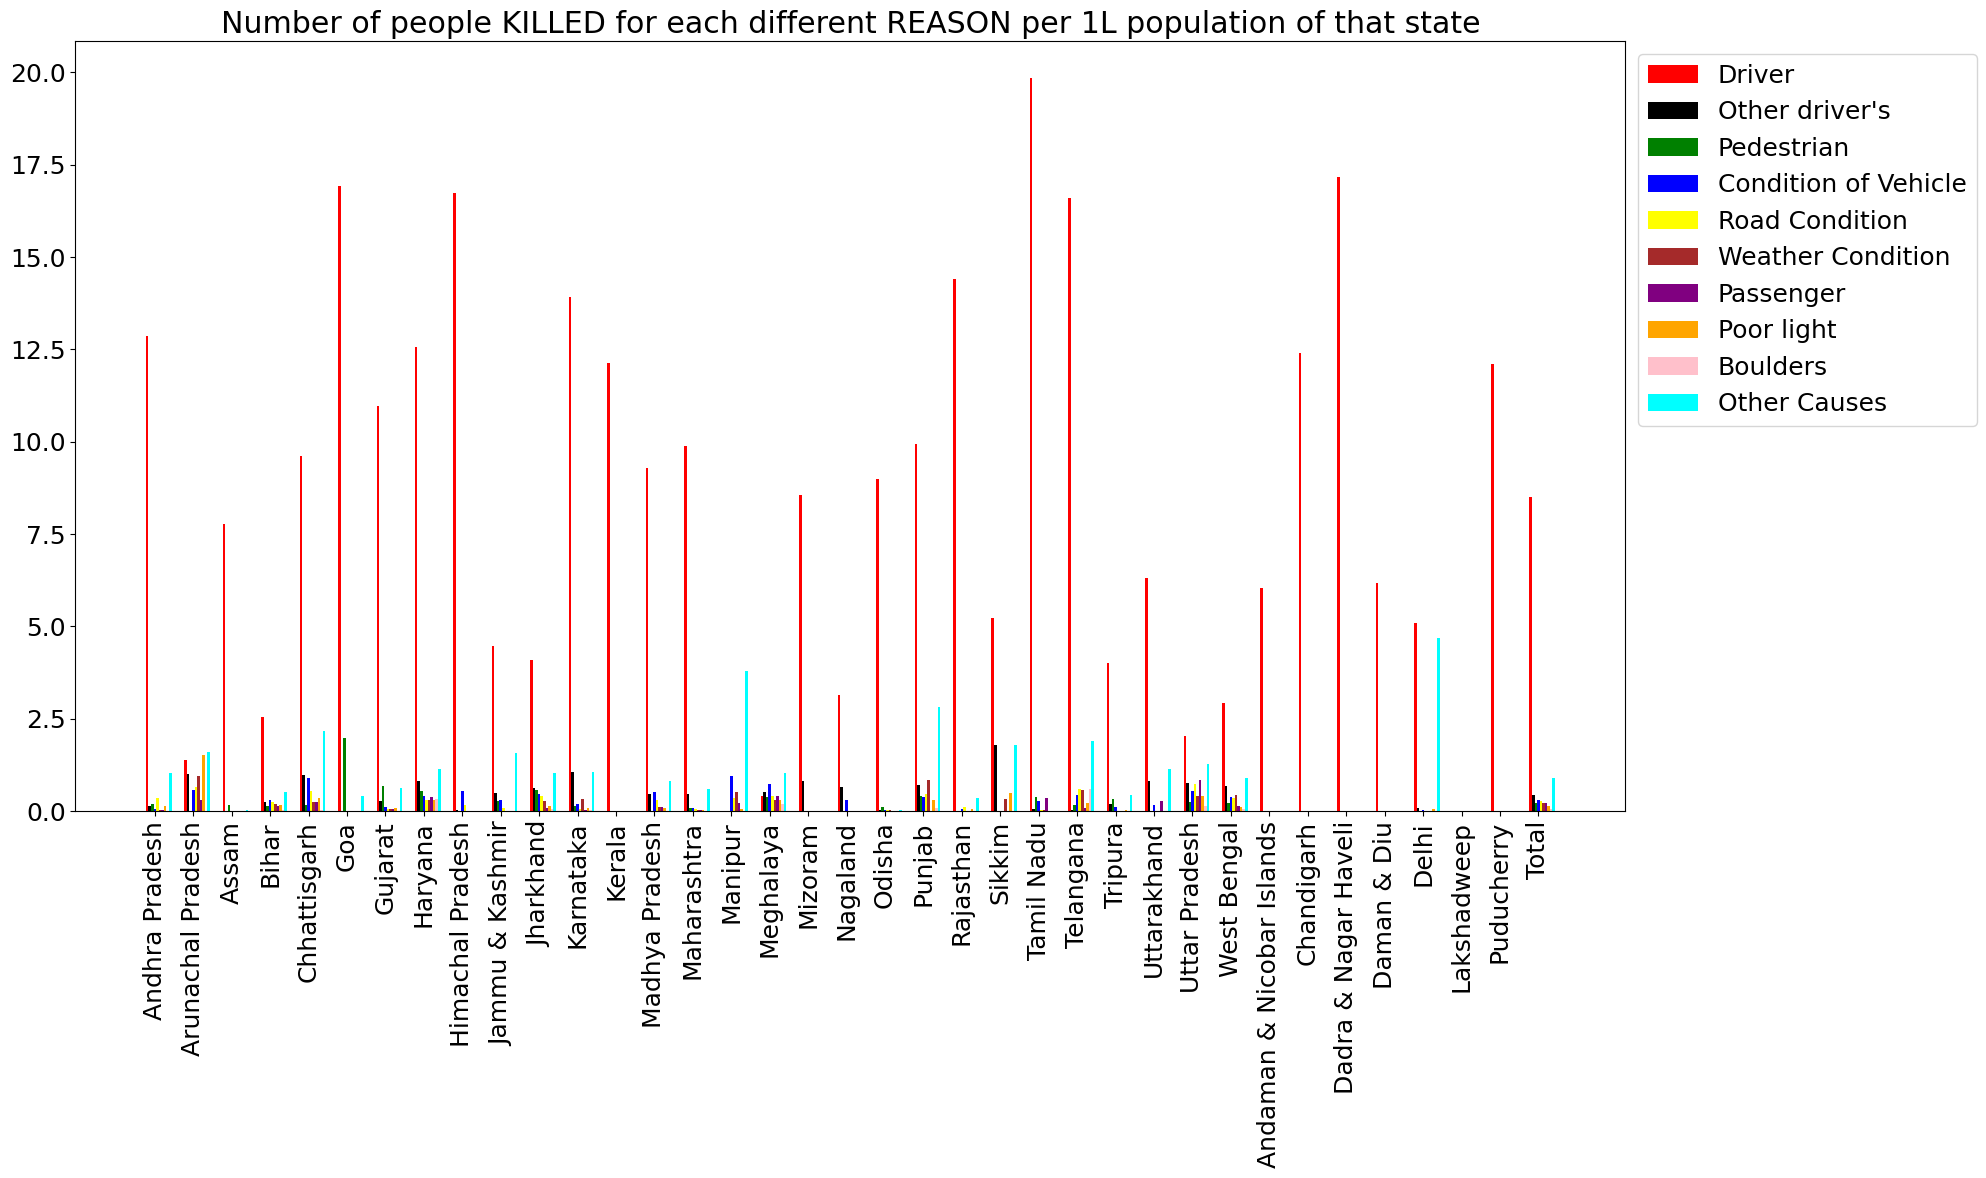

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*3

plt.bar(UT-0.6, driverFault, width = 0.2, color = 'r', align = 'center', label = 'Driver')
plt.bar(UT-0.4, otherDriversFault,width=0.2, color='black', align='center', label='Other driver\'s')
plt.bar(UT-0.2, pedestrianFault,width=0.2, color='g', align='center', label='Pedestrian')
plt.bar(UT, conditionOfVehicleFault,width=0.2, color='b', align='center', label='Condition of Vehicle')
plt.bar(UT+0.2, roadConditionFault,width=0.2, color='yellow', align='center', label='Road Condition')
plt.bar(UT+0.4, weatherConditionFault,width=0.2, color='brown', align='center', label='Weather Condition')
plt.bar(UT+0.6, passengerFault,width=0.2, color='purple', align='center', label='Passenger')
plt.bar(UT+0.8, poorLightFault,width=0.2, color='orange', align='center', label='Poor light')
plt.bar(UT+1.0, bouldersFault,width=0.2, color='pink', align='center', label='Boulders')
plt.bar(UT+1.2, otherCauses,width=0.2, color='cyan', align='center', label='Other Causes')

plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people KILLED for each different REASON per 1L population of that state")
plt.show()

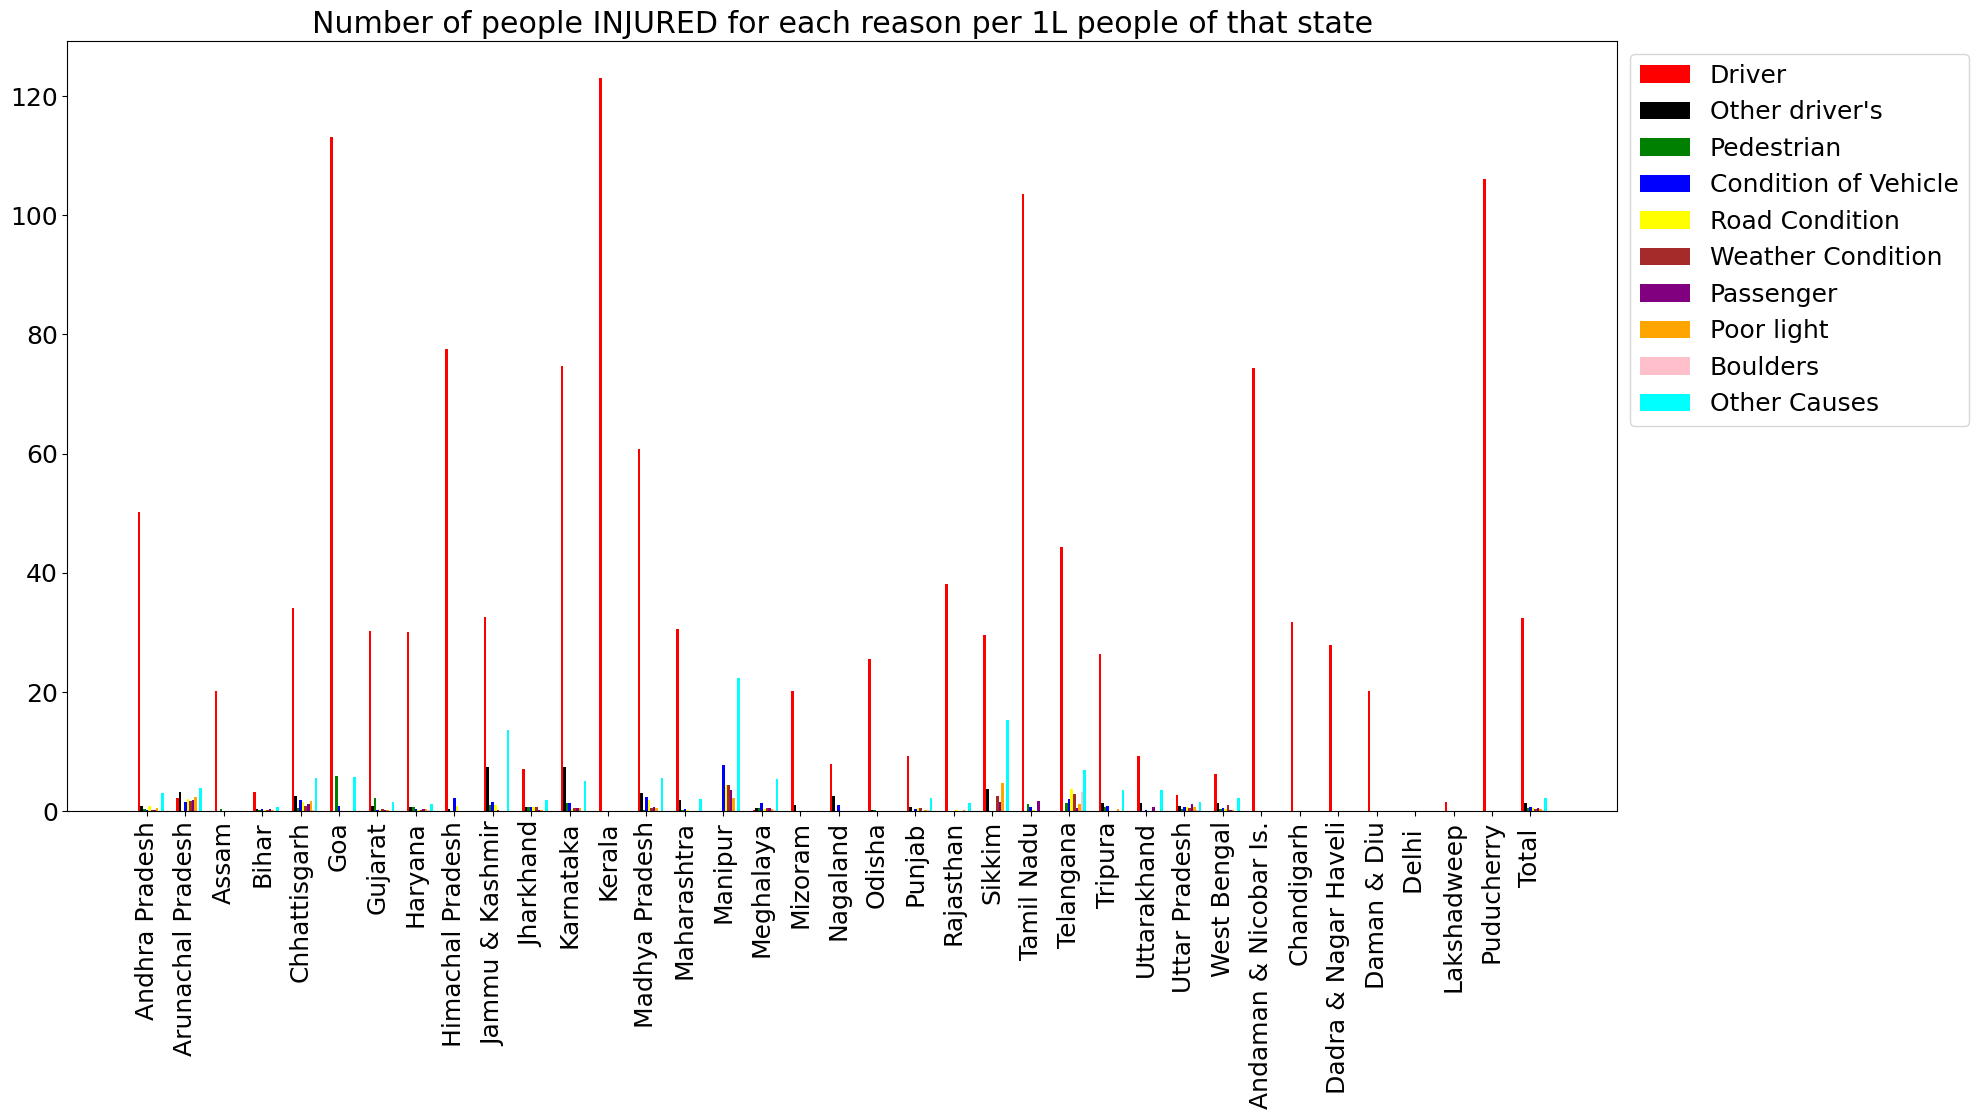

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6, df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4, df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2, df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT, df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2, df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4, df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6, df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8, df5['Poor light-Number of Persons-Injured - 2014 per 1L people'], width=0.2, color='orange',align='center',label='Poor light')
plt.bar(UT+1.0, df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2, df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people INJURED for each reason per 1L people of that state")
plt.show()

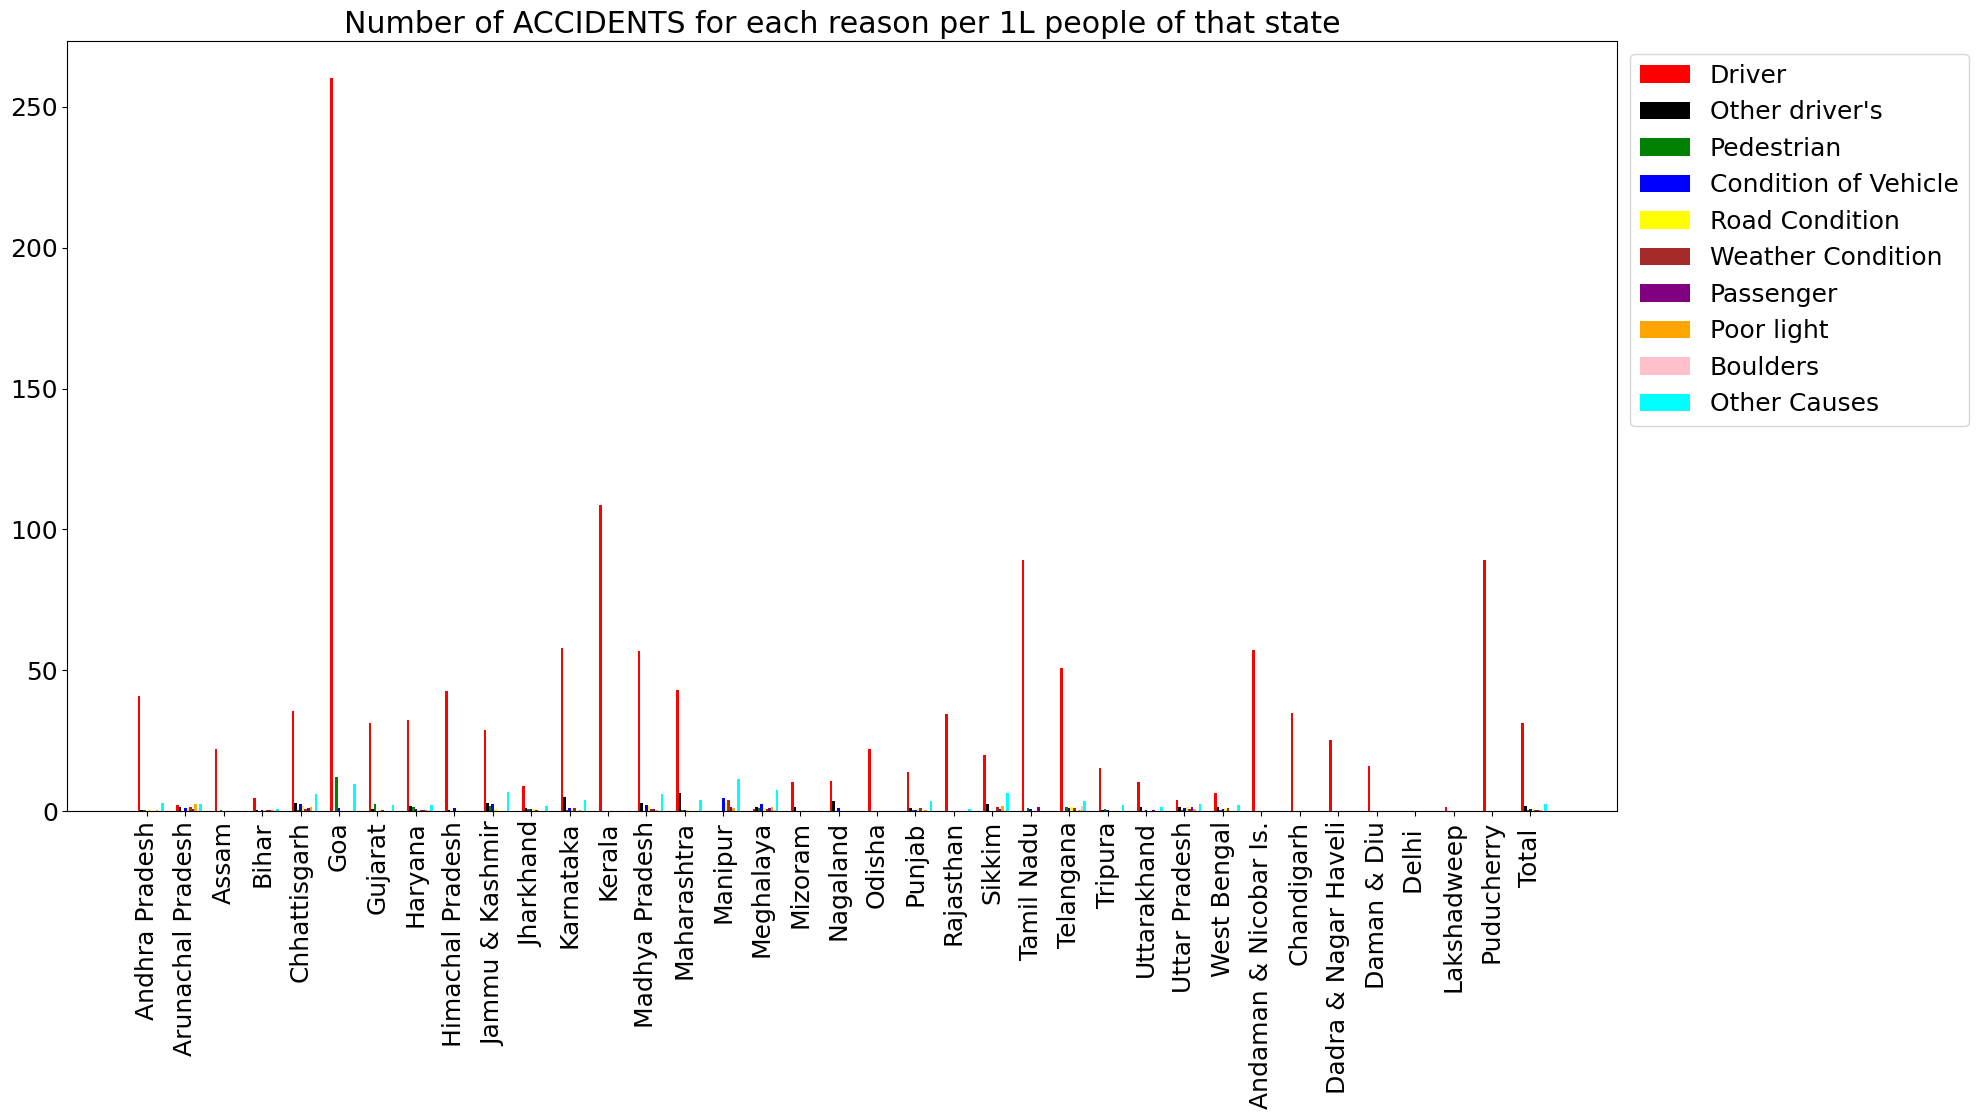

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of ACCIDENTS for each reason per 1L people of that state")
plt.show()

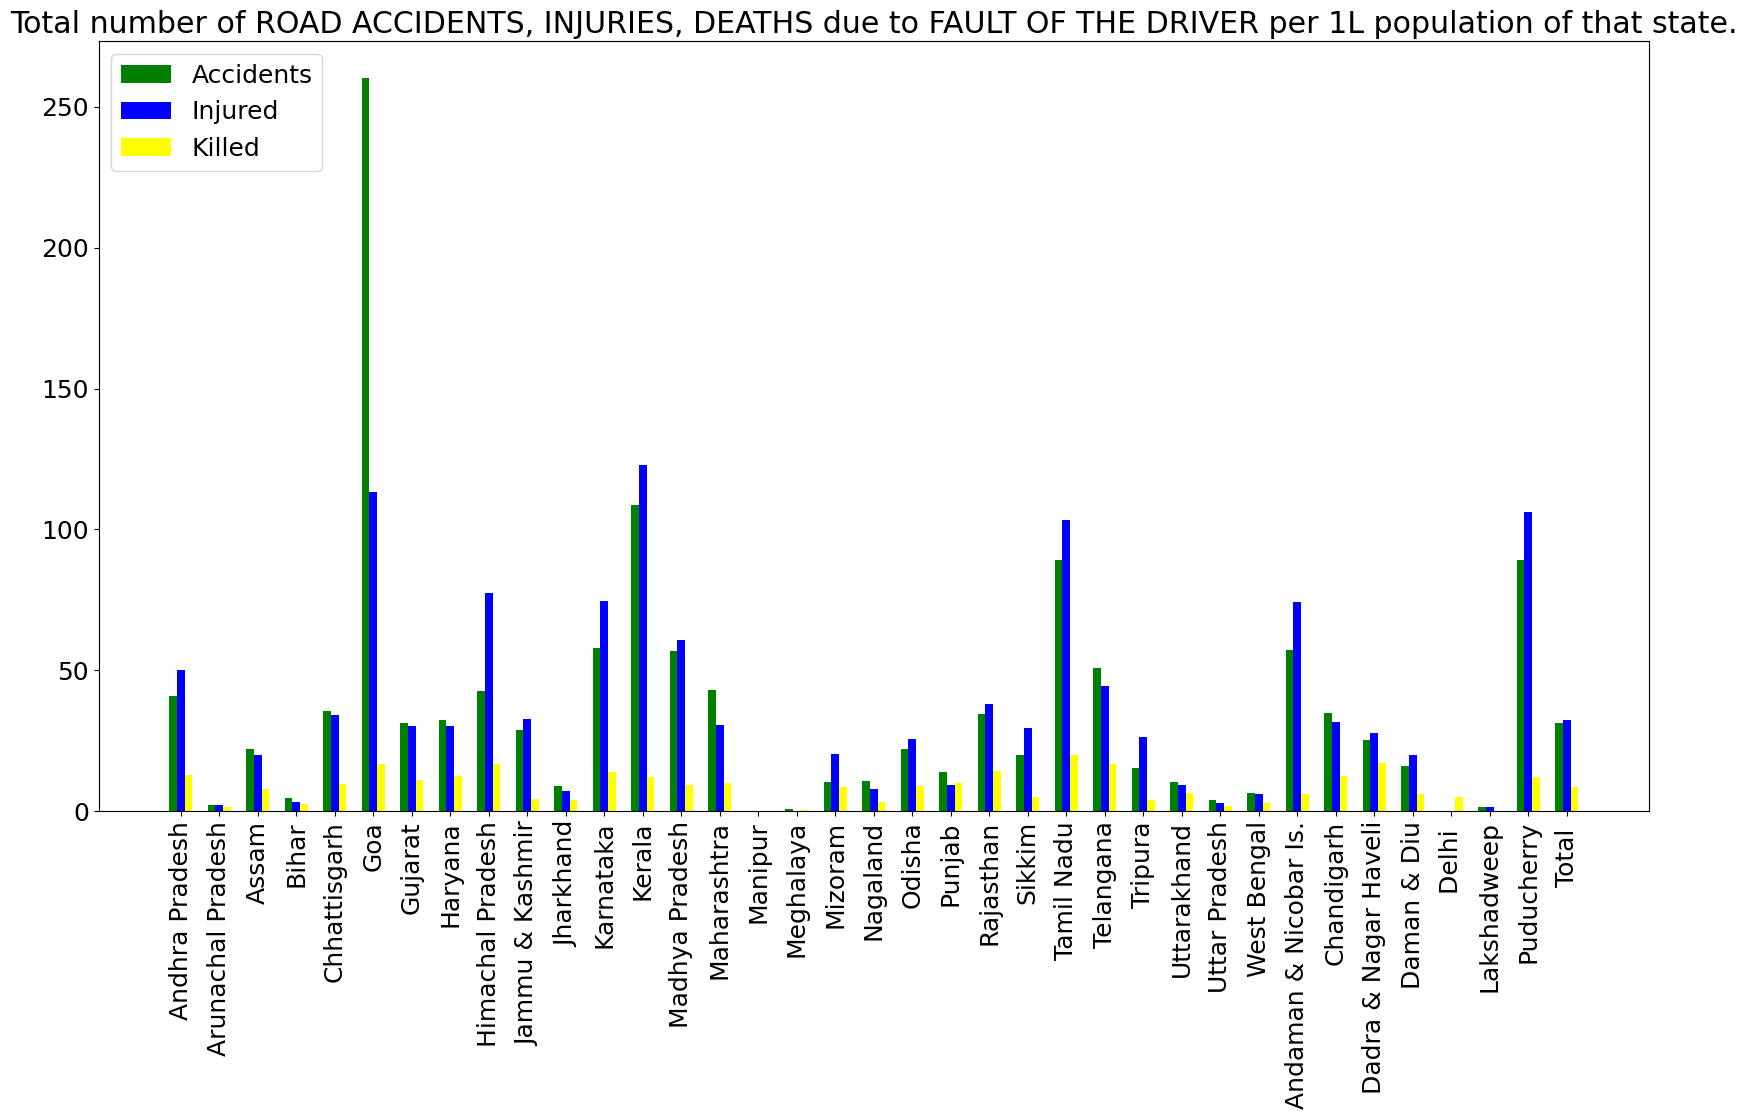

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])

plt.bar(UT-0.2,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.")
plt.show()

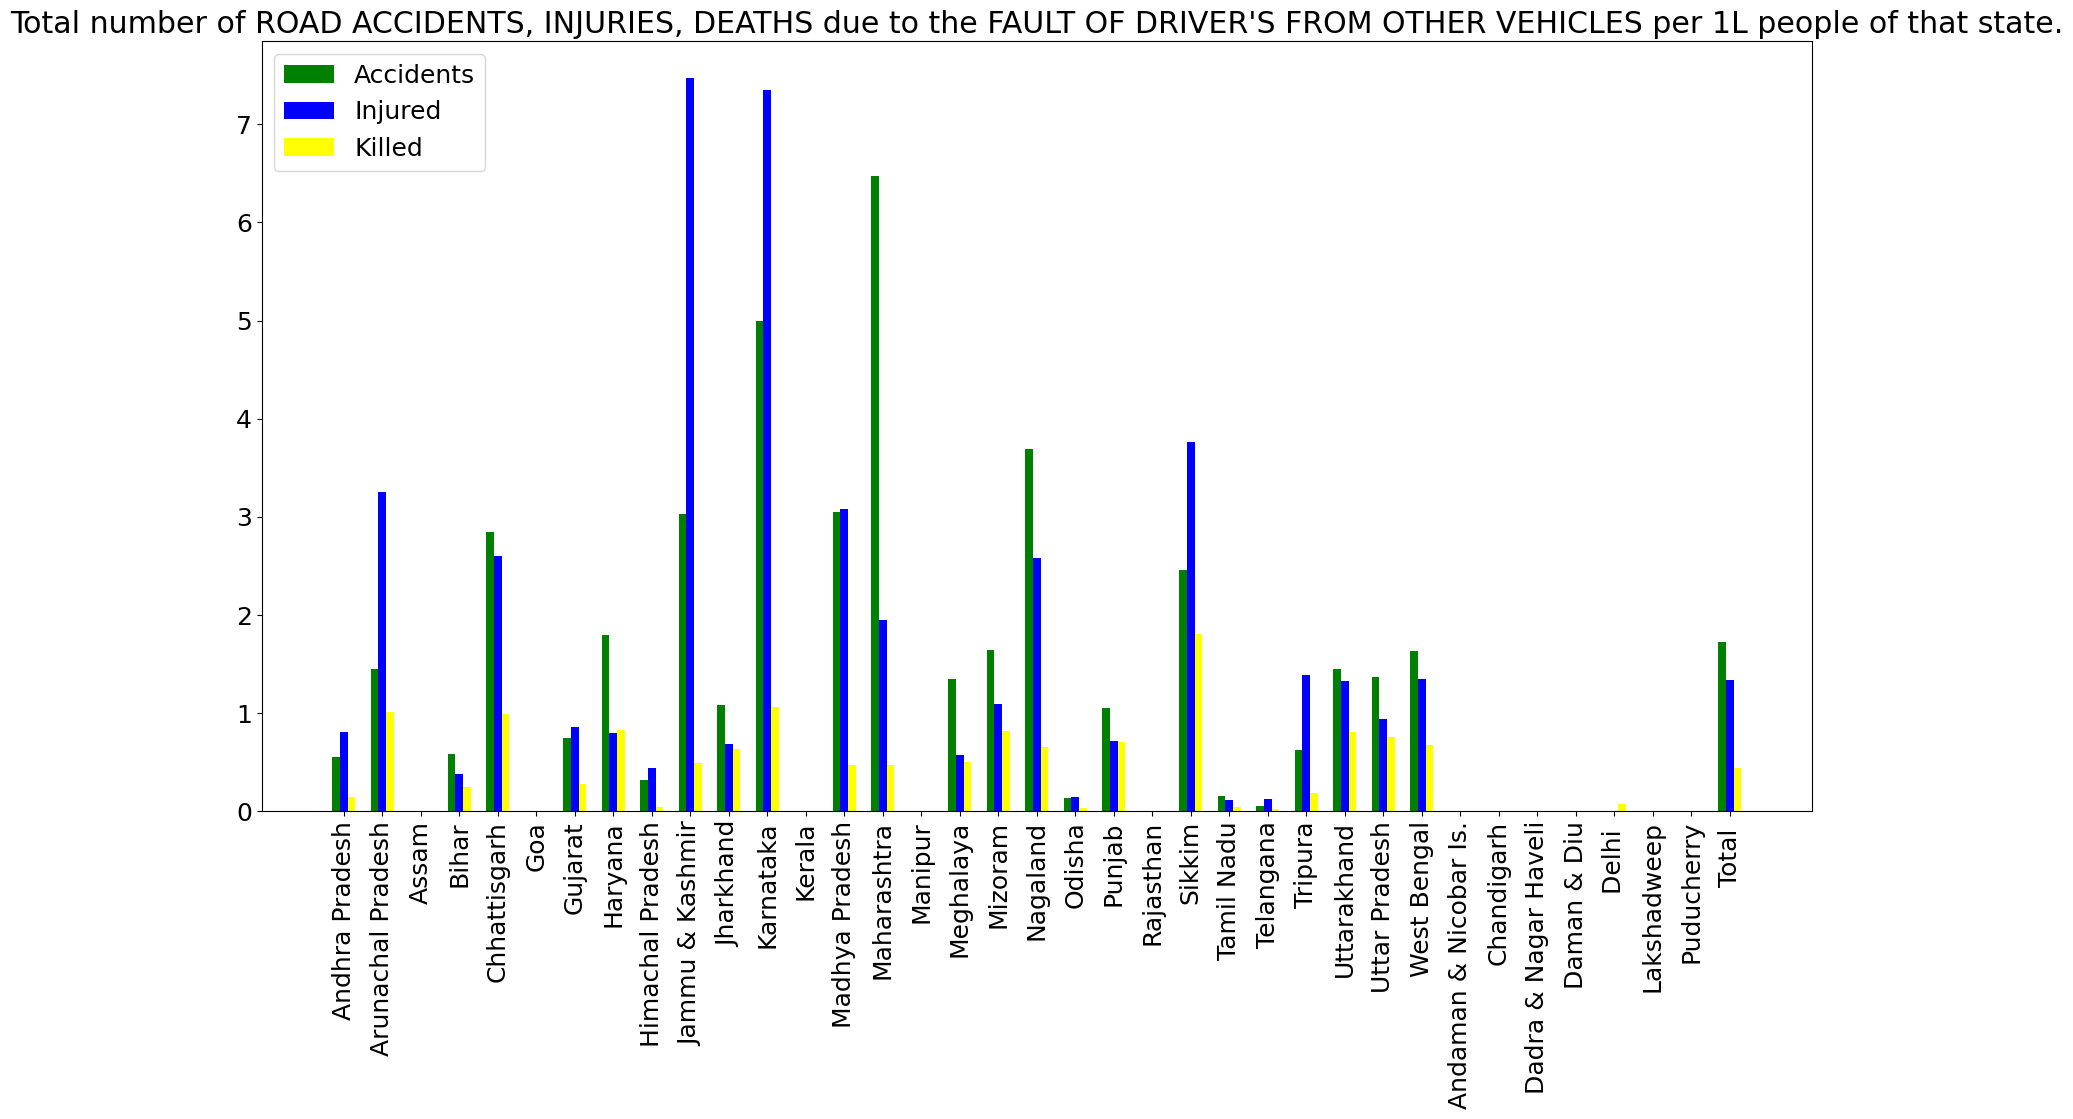

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state.")
plt.show()

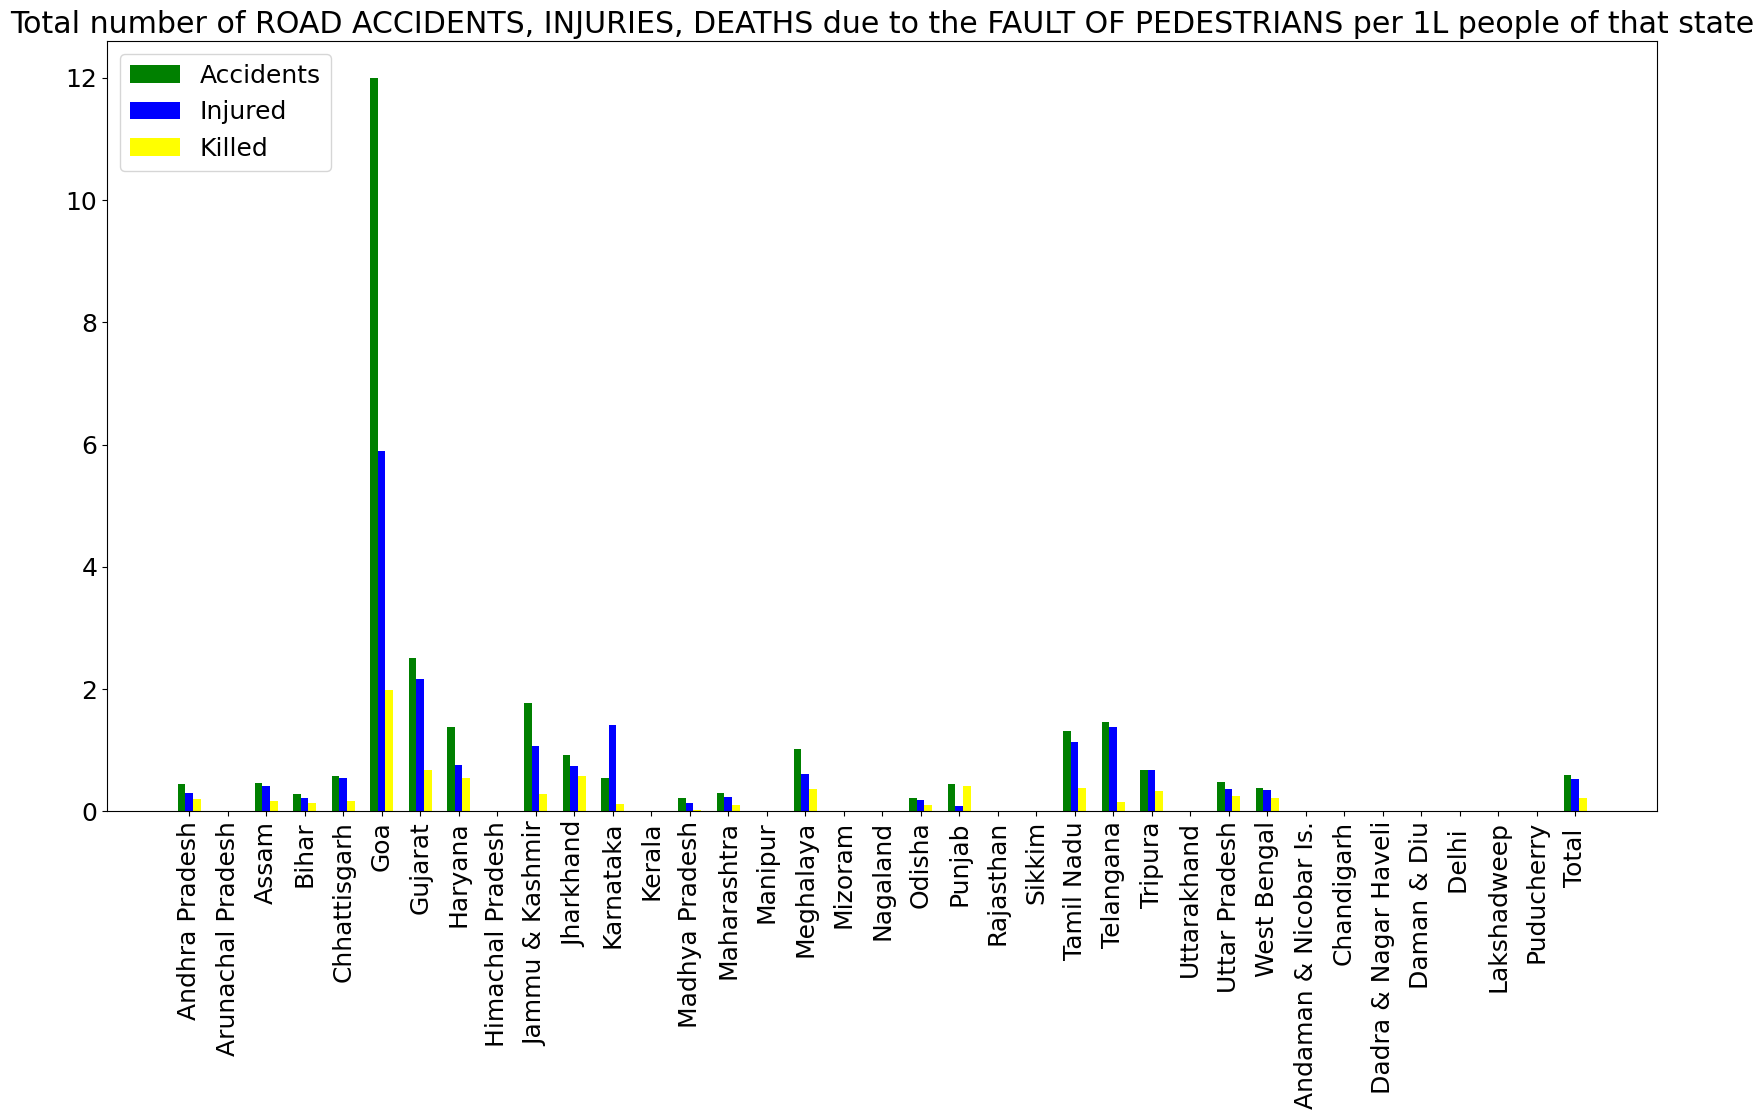

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state")
plt.show()

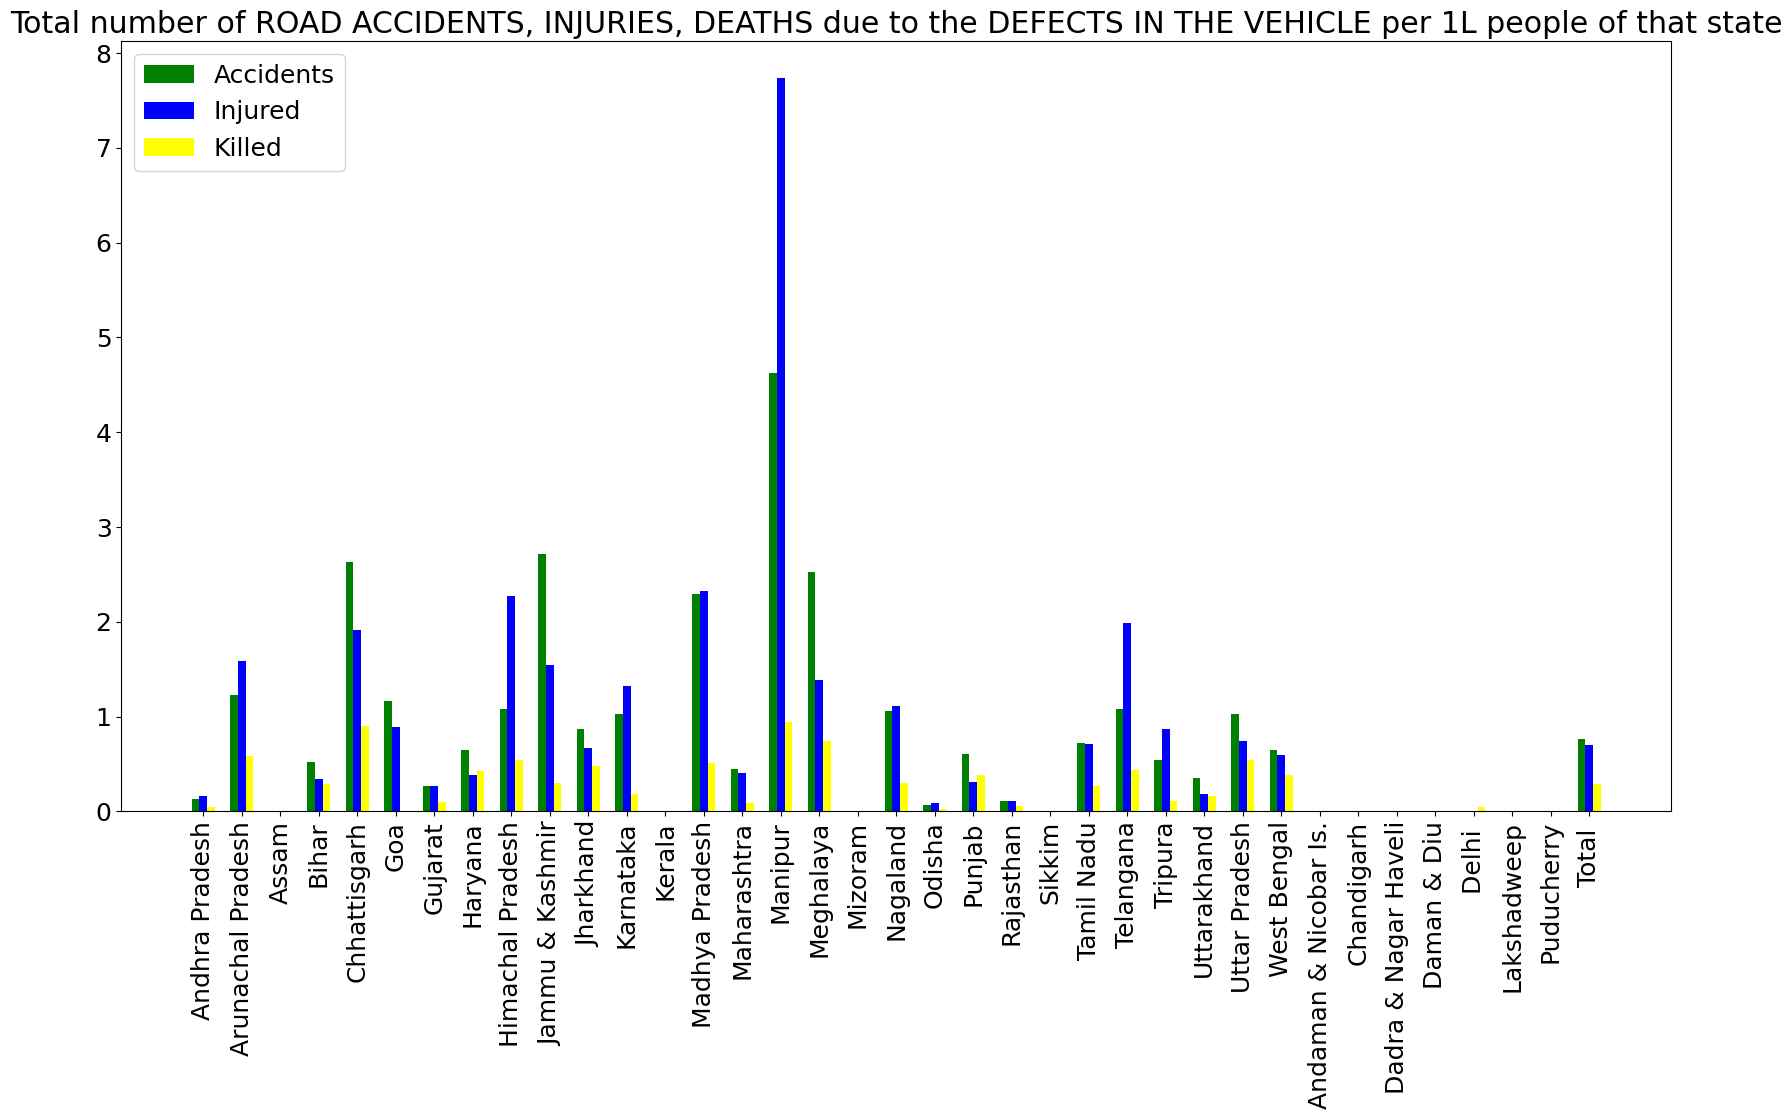

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state")
plt.show()

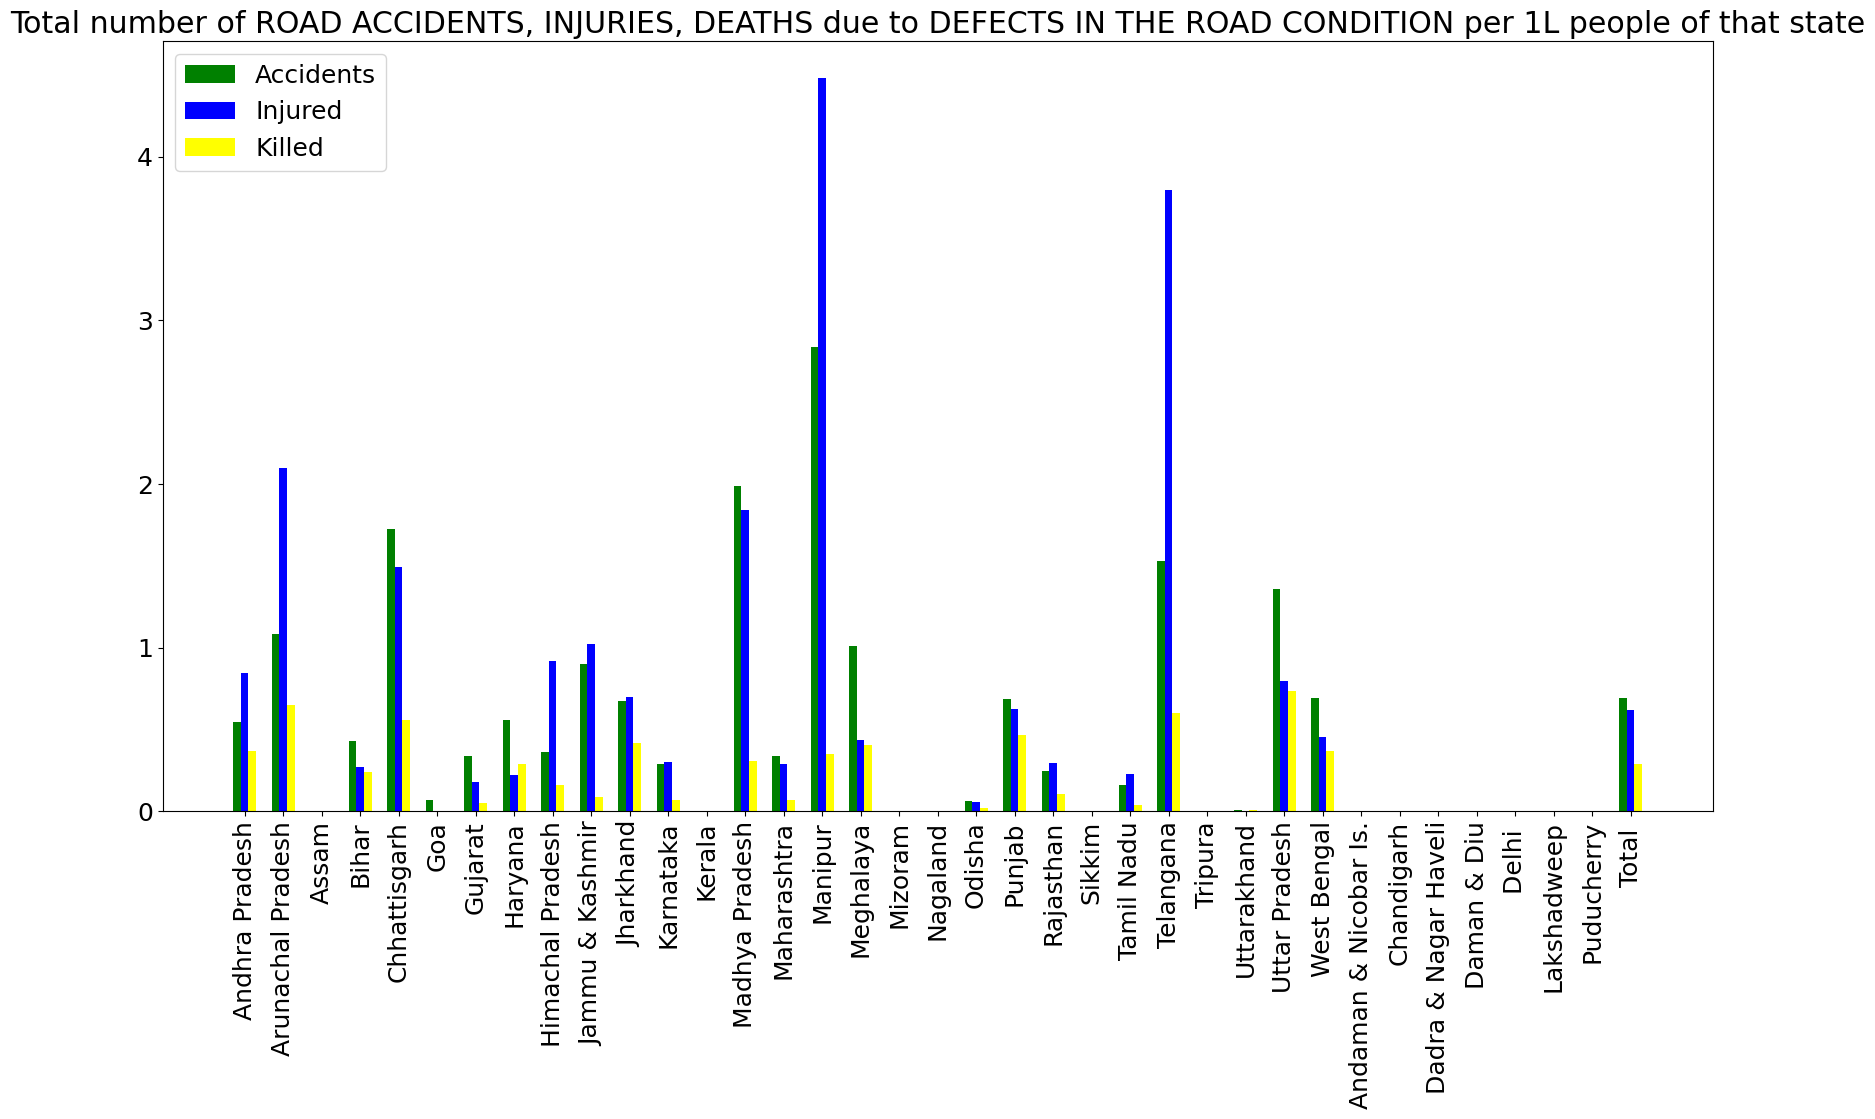

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state")
plt.show()

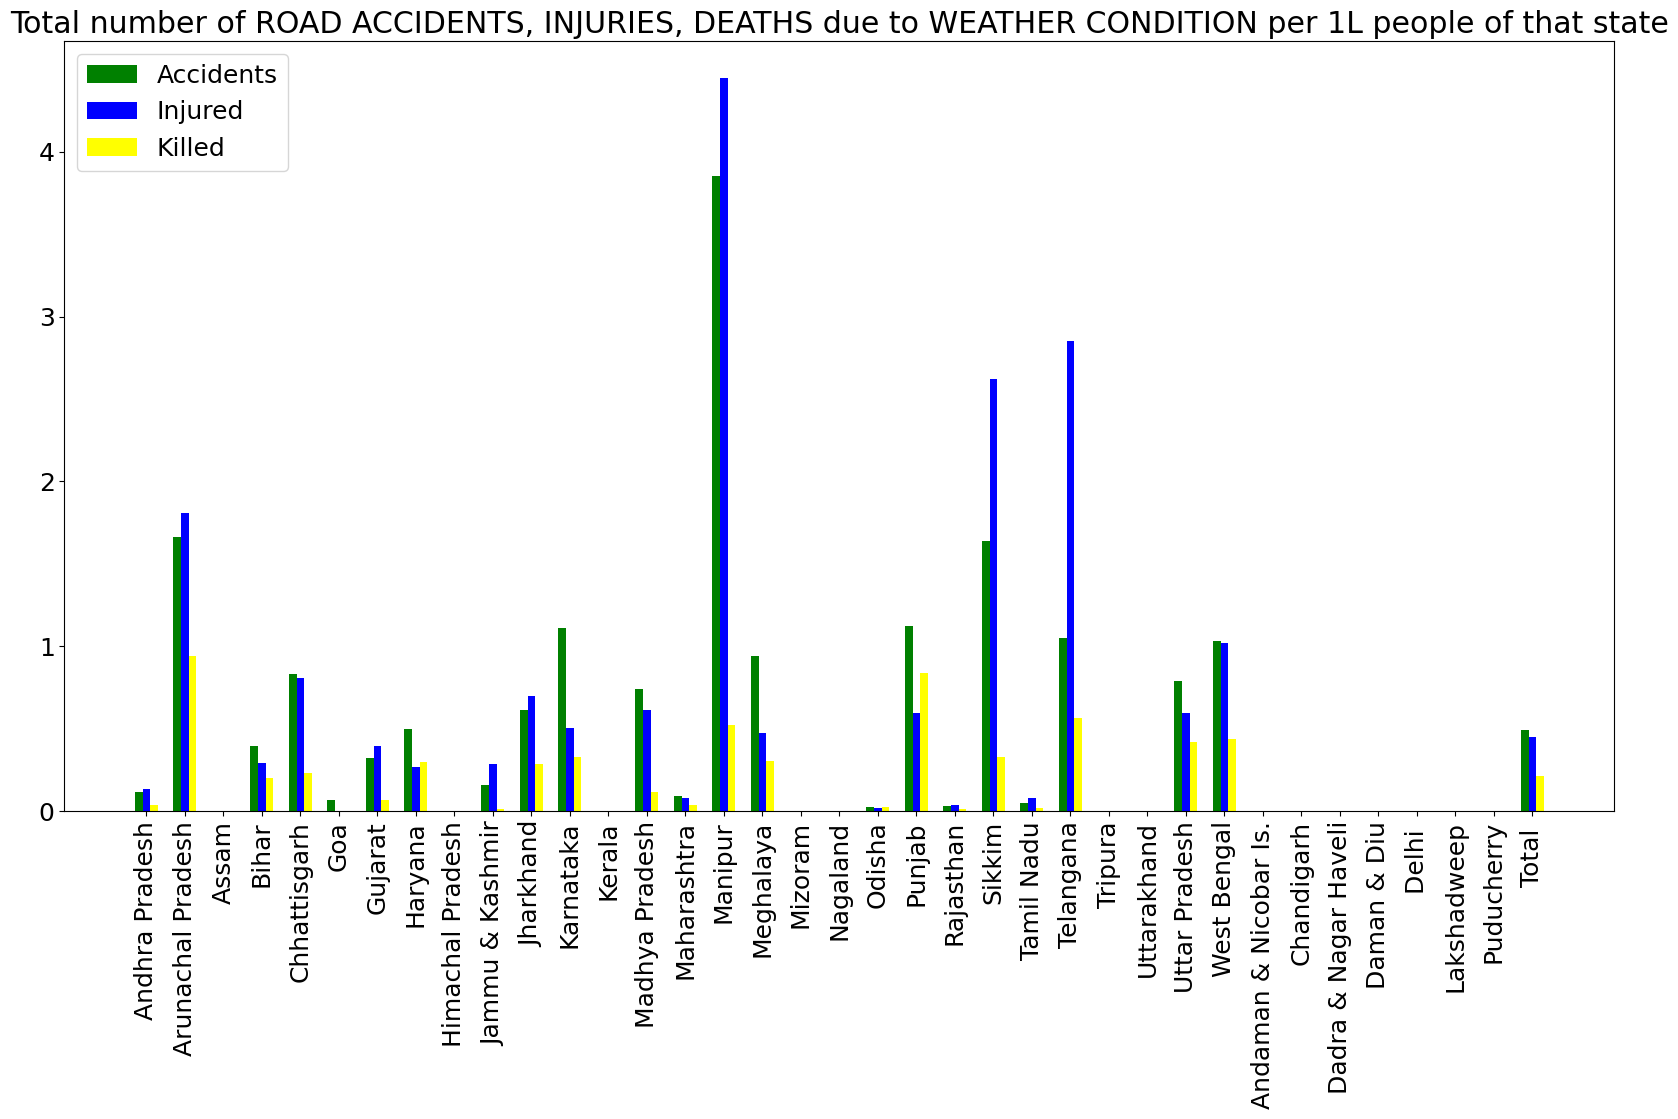

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state")
plt.show()

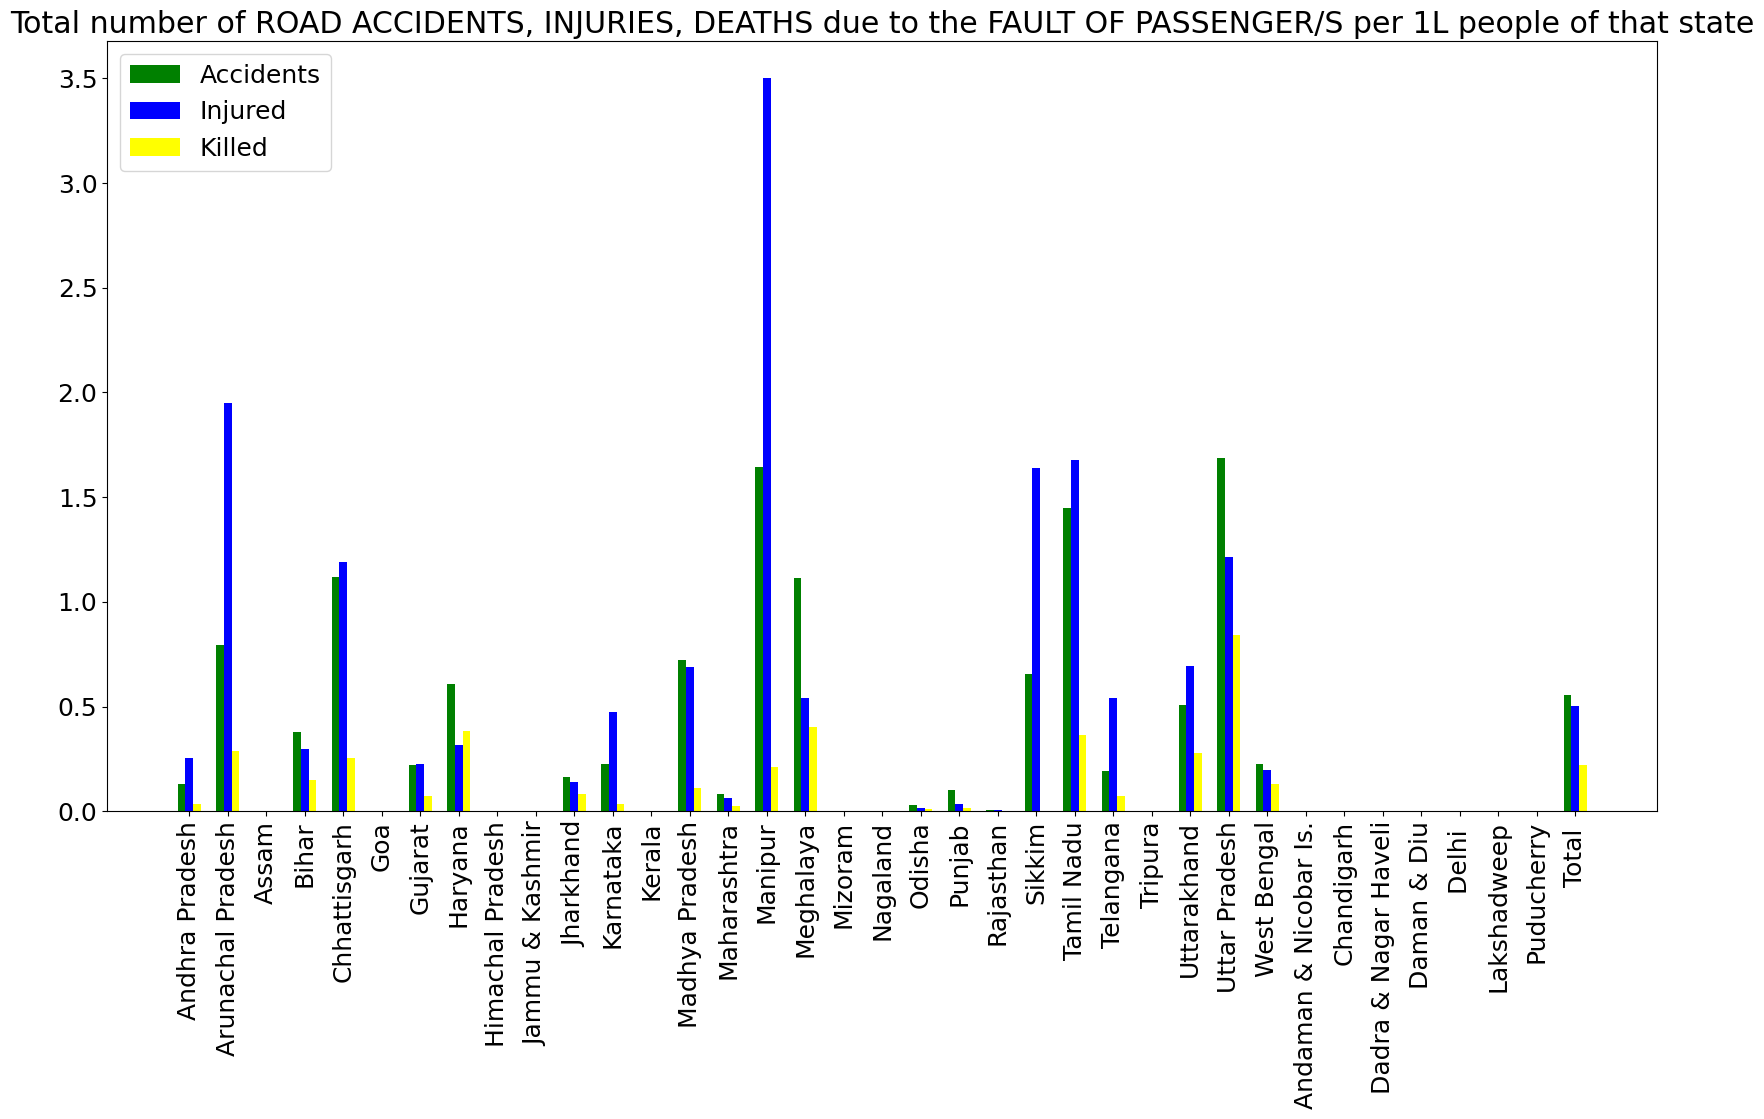

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PASSENGER/S per 1L people of that state")
plt.show()

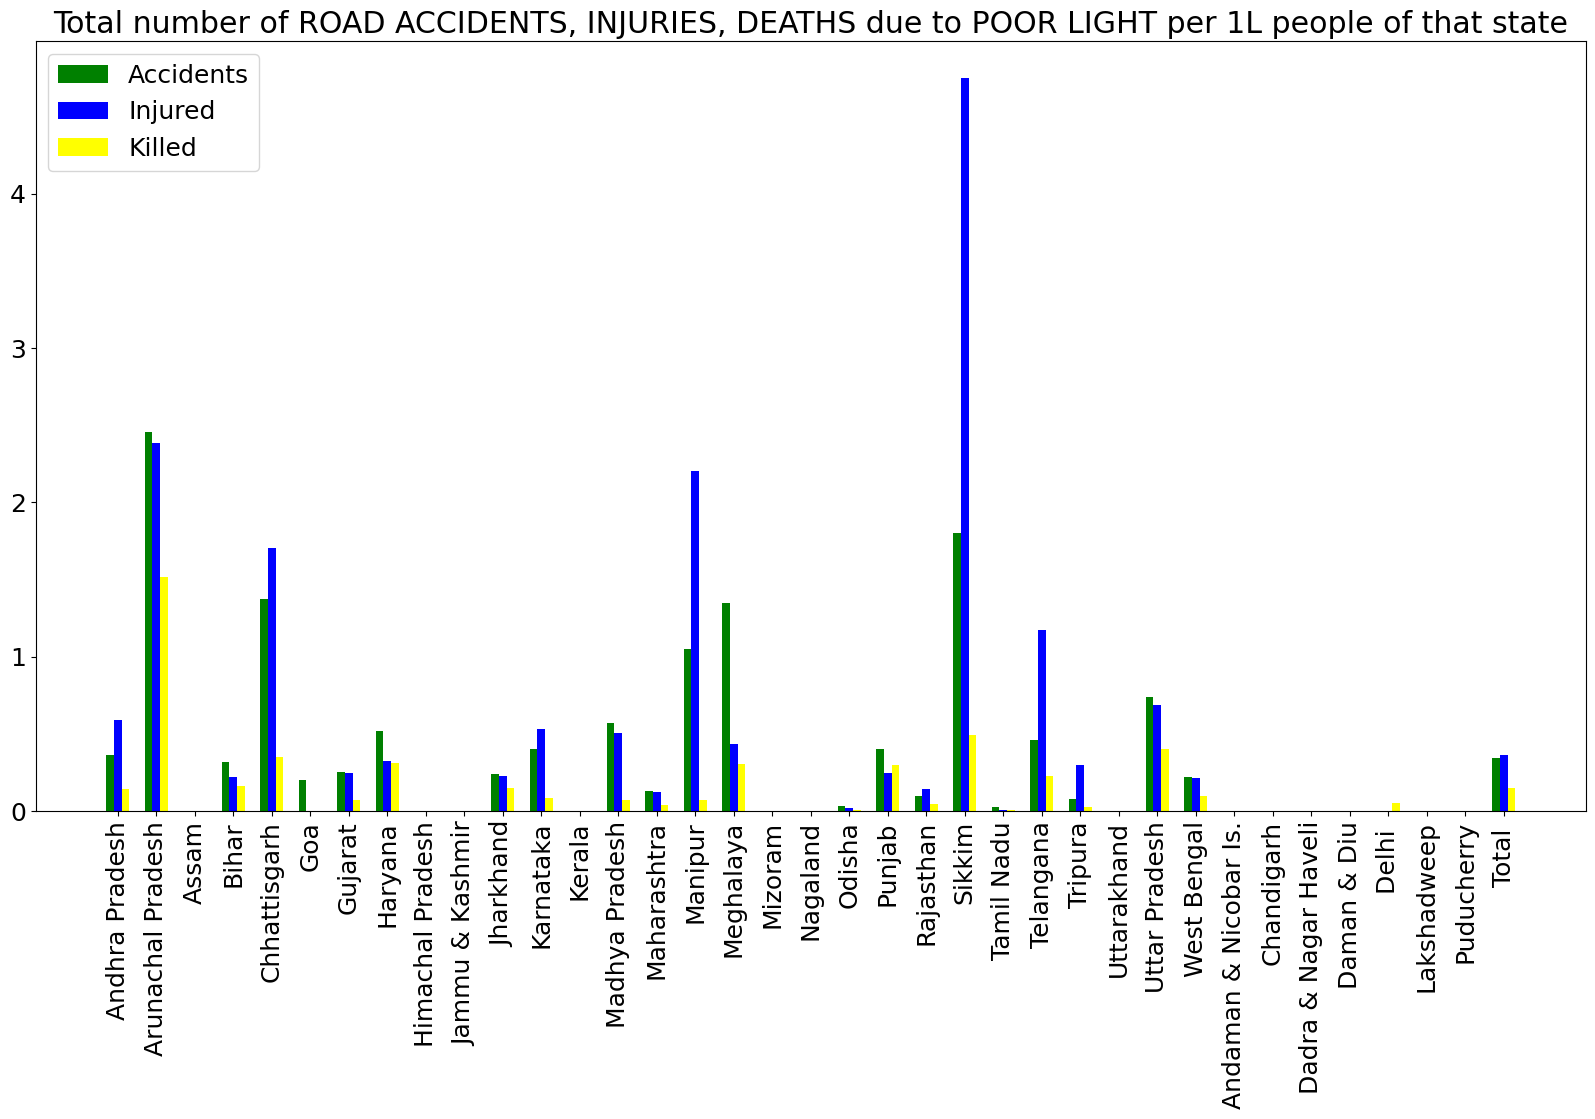

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Poor light-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Poor light-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to POOR LIGHT per 1L people of that state")
plt.show()

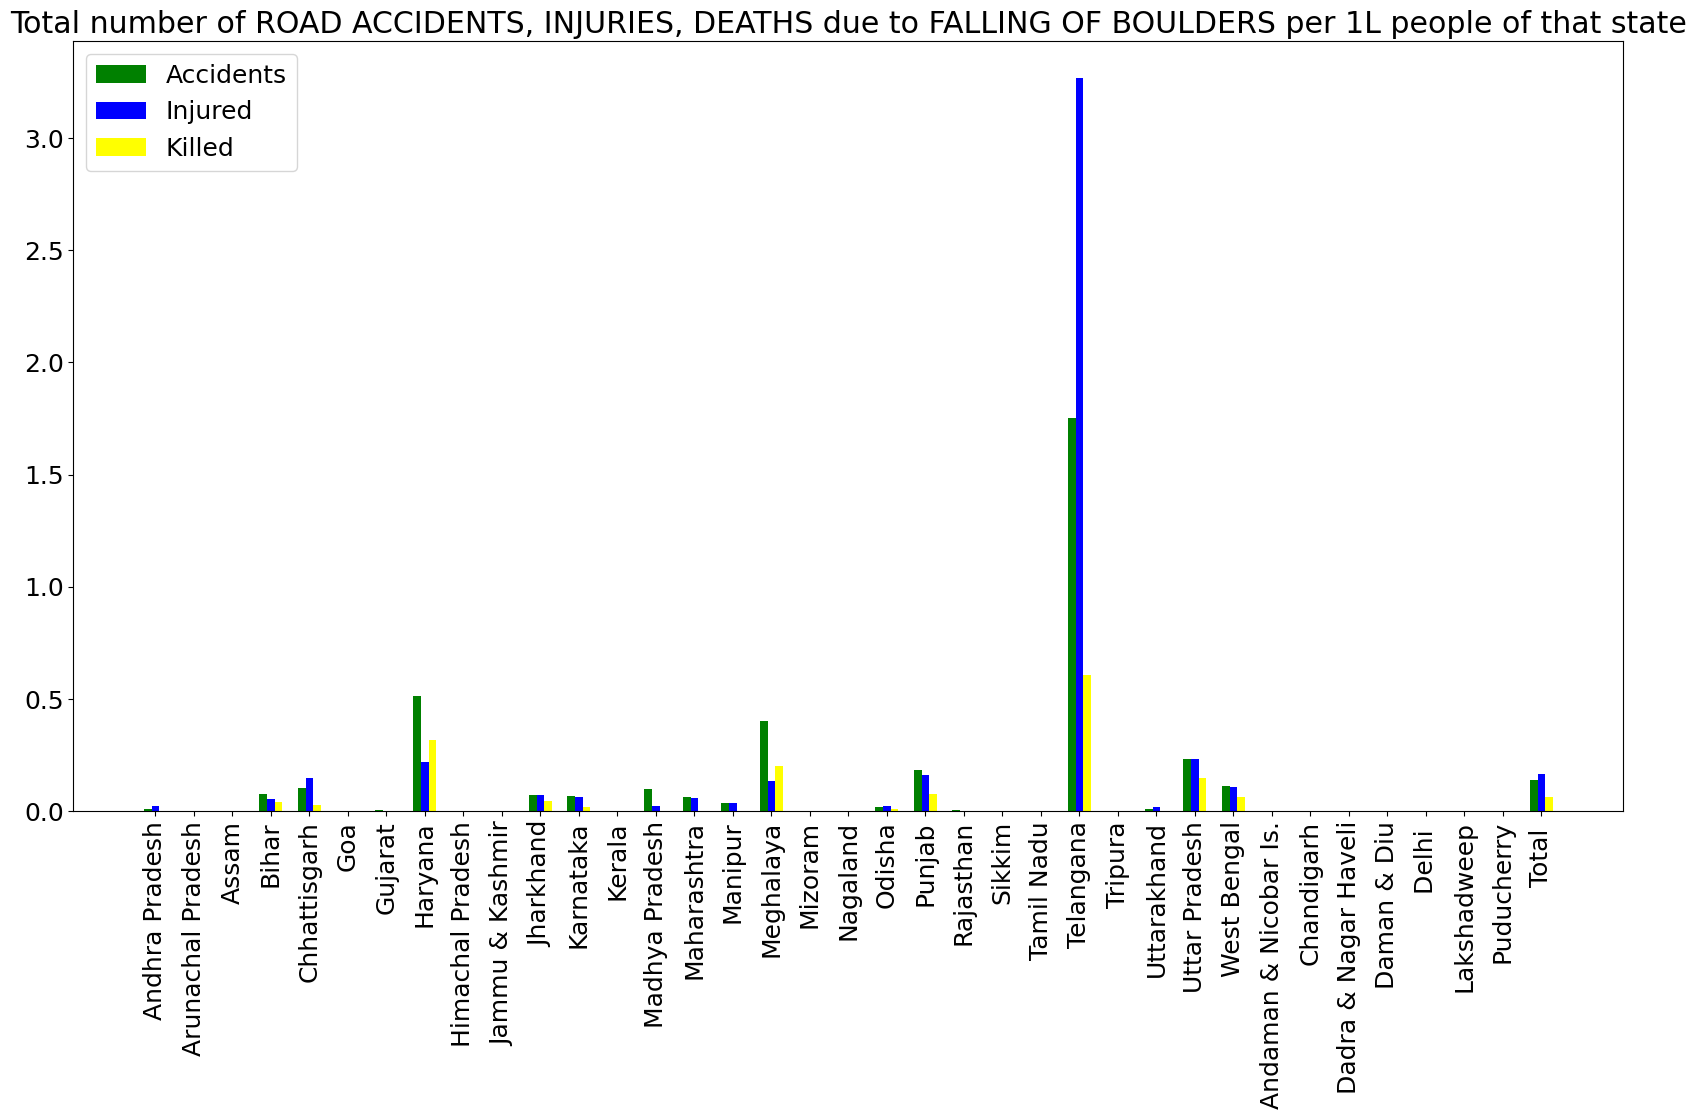

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FALLING OF BOULDERS per 1L people of that state")
plt.show()

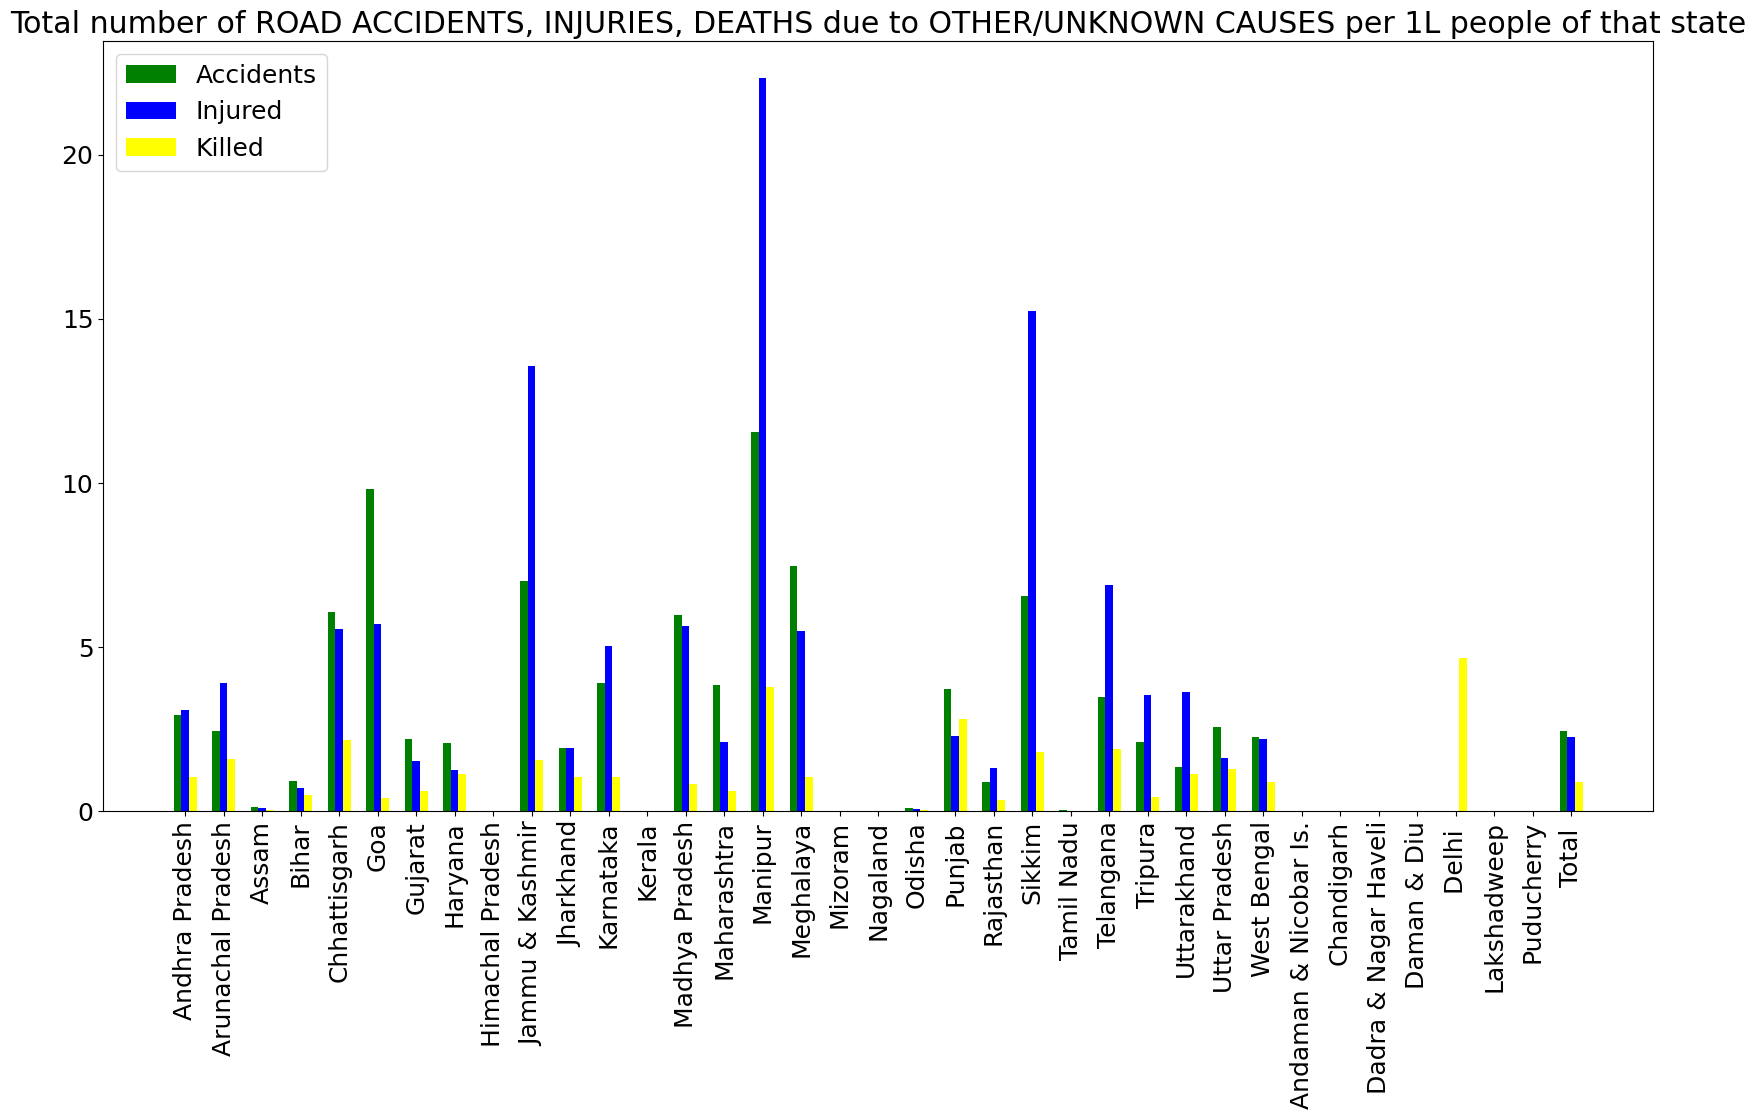

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to OTHER/UNKNOWN CAUSES per 1L people of that state")
plt.show()

In [ ]:
df5['Sum Total Road Accidents - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people']+df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people']+df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people']+df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Poor light-Total No. of Road Accidents - 2014 per 1L people']+df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people']+df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people']

df5['Sum Total Number of Persons Killed - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']+df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']+df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']+df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Poor light-Number of Persons-Killed - 2014 per 1L people']+df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']+df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']

df5['Sum Total Number of Persons Injured - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']+df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']+df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people']+df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Poor light-Number of Persons-Injured - 2014 per 1L people']+df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people']+df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people']

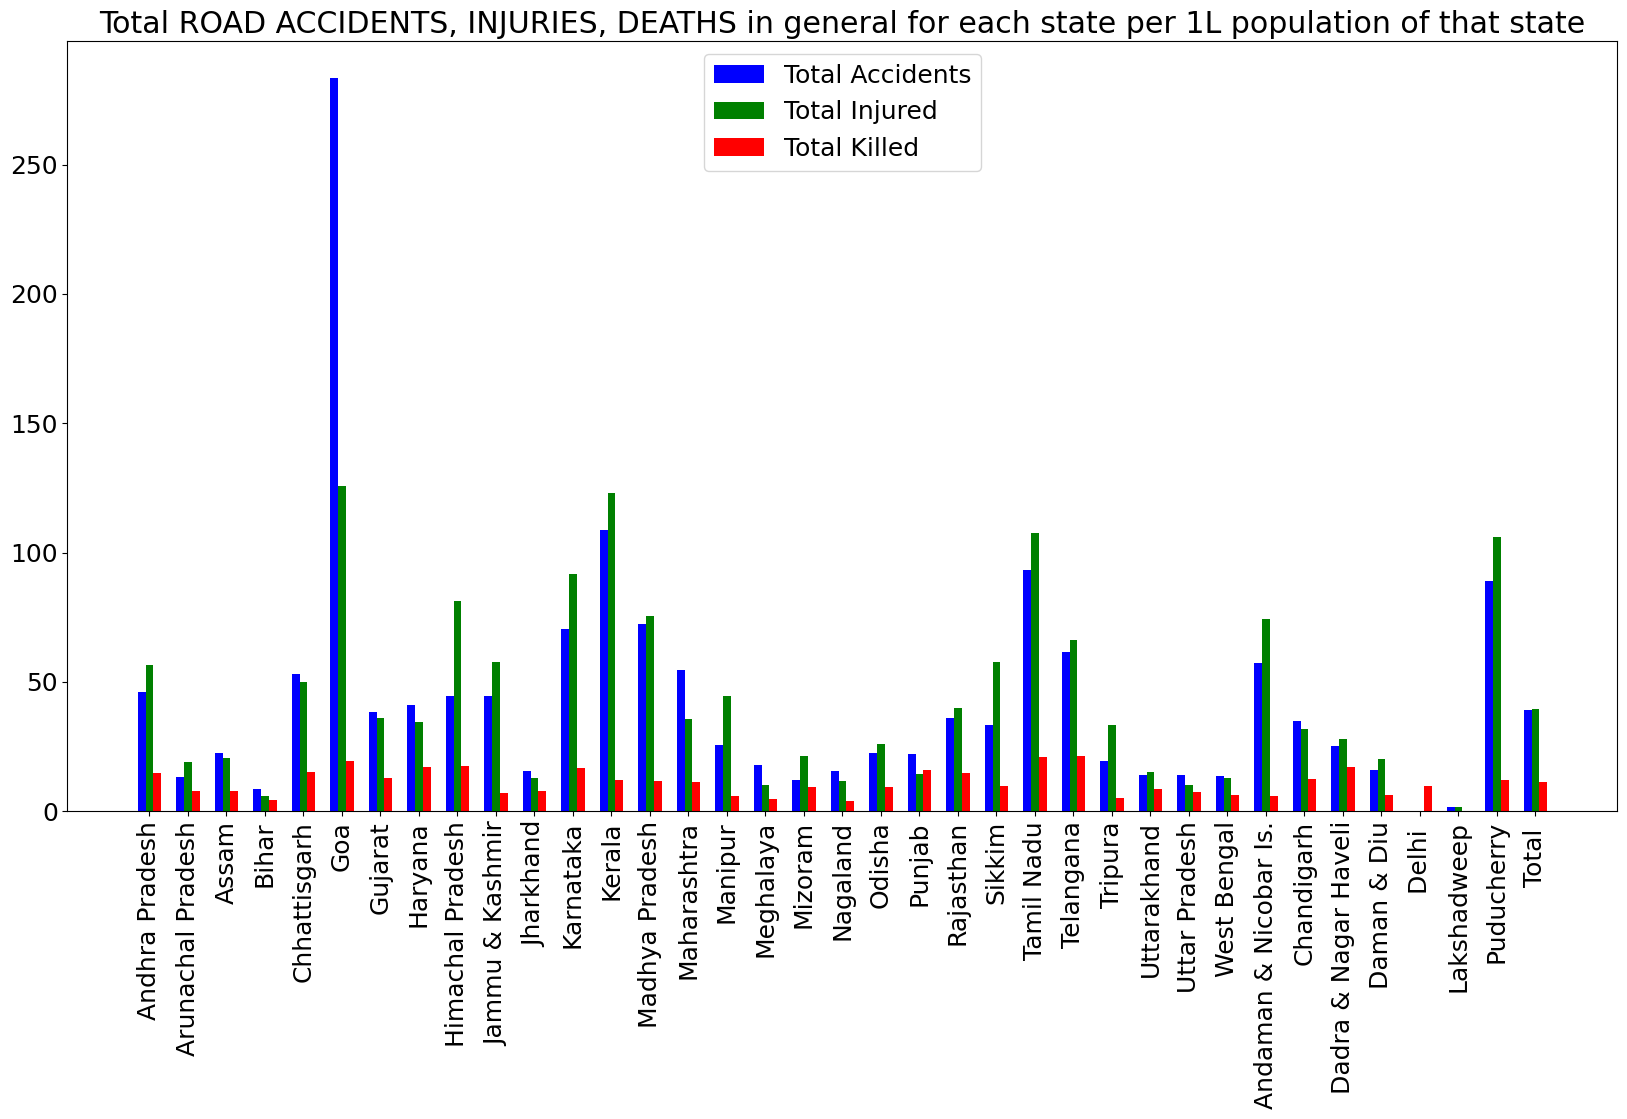

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.2,df5['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT,df5['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Injured')
plt.bar(UT+0.2,df5['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.title("Total ROAD ACCIDENTS, INJURIES, DEATHS in general for each state per 1L population of that state")
plt.legend(loc="best")
plt.show()

In [ ]:
#This is an another dataset, in which we see the prediction of the airplane accidents using ML.

In [ ]:
import pandas as pd

dataset = pd.read_csv(r'C:\Users\varun\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\varun\Downloads\test.csv')

# Now you can use dataset and test dataframes
testing=test

In [ ]:
dataset

Severity  Safety_Score  \
0                   Minor_Damage_And_Injuries     49.223744   
1                   Minor_Damage_And_Injuries     62.465753   
2           Significant_Damage_And_Fatalities     63.059361   
3     Significant_Damage_And_Serious_Injuries     48.082192   
4           Significant_Damage_And_Fatalities     26.484018   
...                                       ...           ...   
9995  Significant_Damage_And_Serious_Injuries     56.118721   
9996                Highly_Fatal_And_Damaging     40.365297   
9997  Significant_Damage_And_Serious_Injuries     27.853881   
9998                Minor_Damage_And_Injuries     56.210046   
9999                Highly_Fatal_And_Damaging     50.000000   

      Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                        14                       22       71.285324   
1                        10                       27       72.288058   
2                        13                       16       66.362808   
3                        11                        9       74.703737   
4                        13                       25       47.948952   
...                     ...                      ...             ...   
9995                      8                        1       63.445761   
9996                     10                        7       62.169553   
9997                     17                        1       69.598906   
9998                      8                        0       39.835916   
9999                     13                        3       45.487694   

      Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0                  0.272118              78.04                   2   
1                  0.423939              84.54                   2   
2                  0.322604              78.86                   7   
3                  0.337029              81.79                   3   
4                  0.541140              77.16                   3   
...                     ...                ...                 ...   
9995               0.482359              78.64                   5   
9996               0.421775              79.77                   4   
9997               0.318277              80.37                   3   
9998               0.598118              76.92                   5   
9999               0.382467              77.46                   5   

      Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0      31335.476824           3                0.424352         7570  
1      26024.711057           2                0.352350        12128  
2      39269.053927           3                0.003364         2181  
3      42771.499200           1                0.211728         5946  
4      35509.228515           2                0.176883         9054  
...             ...         ...                     ...          ...  
9995   38537.363408           2                0.026150        11493  
9996   40846.916900           2                0.074898          305  
9997   33771.996300           3                0.168173          612  
9998   39820.419251           2                0.026381         4963  
9999   26005.322987           2                0.017036         9387  

[10000 rows x 12 columns]

In [ ]:
X = dataset[['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation', 'Violations', 'Adverse_Weather_Metric']]

In [ ]:
X

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0        49.223744                     14                       22   
1        62.465753                     10                       27   
2        63.059361                     13                       16   
3        48.082192                     11                        9   
4        26.484018                     13                       25   
...            ...                    ...                      ...   
9995     56.118721                      8                        1   
9996     40.365297                     10                        7   
9997     27.853881                     17                        1   
9998     56.210046                      8                        0   
9999     50.000000                     13                        3   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0          71.285324               0.272118              78.04   
1          72.288058               0.423939              84.54   
2          66.362808               0.322604              78.86   
3          74.703737               0.337029              81.79   
4          47.948952               0.541140              77.16   
...              ...                    ...                ...   
9995       63.445761               0.482359              78.64   
9996       62.169553               0.421775              79.77   
9997       69.598906               0.318277              80.37   
9998       39.835916               0.598118              76.92   
9999       45.487694               0.382467              77.46   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                      2   31335.476824           3                0.424352  
1                      2   26024.711057           2                0.352350  
2                      7   39269.053927           3                0.003364  
3                      3   42771.499200           1                0.211728  
4                      3   35509.228515           2                0.176883  
...                  ...            ...         ...                     ...  
9995                   5   38537.363408           2                0.026150  
9996                   4   40846.916900           2                0.074898  
9997                   3   33771.996300           3                0.168173  
9998                   5   39820.419251           2                0.026381  
9999                   5   26005.322987           2                0.017036  

[10000 rows x 10 columns]

In [ ]:
X.isnull().any()

Safety_Score               False
Days_Since_Inspection      False
Total_Safety_Complaints    False
Control_Metric             False
Turbulence_In_gforces      False
Cabin_Temperature          False
Accident_Type_Code         False
Max_Elevation              False
Violations                 False
Adverse_Weather_Metric     False
dtype: bool

In [ ]:
X.isnull().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
dtype: int64

In [ ]:
y = dataset[['Severity']]
y

Severity
0                   Minor_Damage_And_Injuries
1                   Minor_Damage_And_Injuries
2           Significant_Damage_And_Fatalities
3     Significant_Damage_And_Serious_Injuries
4           Significant_Damage_And_Fatalities
...                                       ...
9995  Significant_Damage_And_Serious_Injuries
9996                Highly_Fatal_And_Damaging
9997  Significant_Damage_And_Serious_Injuries
9998                Minor_Damage_And_Injuries
9999                Highly_Fatal_And_Damaging

[10000 rows x 1 columns]

In [ ]:
y

array([1, 0, 1, 1], dtype=int64)

In [ ]:
y.isnull().any()

Severity    False
dtype: bool

In [ ]:
y.isnull().sum()

Severity    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

le.classes_
print("Highly_Fatal_And_Damaging: ",le.classes_[0])
print("Minor_Damage_And_Injuries: ",le.classes_[1])
print("Significant_Damage_And_Fatalities: ",le.classes_[2])
print("Significant_Damage_And_Serious_Injuries: ",le.classes_[3])

Highly_Fatal_And_Damaging:  Highly_Fatal_And_Damaging
Minor_Damage_And_Injuries:  Minor_Damage_And_Injuries
Significant_Damage_And_Fatalities:  Significant_Damage_And_Fatalities
Significant_Damage_And_Serious_Injuries:  Significant_Damage_And_Serious_Injuries


D:\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([1, 1, 2, ..., 3, 1, 0])

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Calculate F1 score on the testing data
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Print the F1 score
print("F1 Score:", f1)


F1 Score: 44.61498665979652


In [ ]:
y_test.shape

(2500,)

In [ ]:
# Gaussian NaiveBayes

clf = GaussianNB()
gnbModel = clf.fit(X,y)
gnbModel.score(X,y)
# Assuming `testing` is your dataset and "Accident_ID" is a column to be removed
testing_without_id = testing.drop(columns=["Accident_ID"])

# Now, you can use `testing_without_id` for prediction
y_pred2 = gnbModel.predict(testing_without_id)

f1_score(y_test, y_pred2, average='weighted') * 100

25.400619118866263

In [ ]:
#Multinomial NB

mnb = MultinomialNB()
mnbModel = mnb.fit(X,y)
mnb.score(X,y)
# Assuming `testing` is your dataset and "Accident_ID" is a column to be removed
testing_without_id = testing.drop(columns=["Accident_ID"])

# Now, you can use `testing_without_id` for prediction
y_pred3 = mnbModel.predict(testing_without_id)

f1_score(y_test, y_pred3, average='weighted') * 100

24.673323367468853

In [ ]:
#Decision Tree

tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, max_leaf_nodes=None, random_state=0, max_depth=None)
treeModel = tree.fit(X,y)
treeModel.score(X,y)
testing_without_id = testing.drop(columns=["Accident_ID"])
y_pred4 = treeModel.predict(testing_without_id)
f1_score(y_test, y_pred4, average='weighted') * 100

25.72950929236753

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lrModel = lr.fit(X,y)
lrModel.score(X,y)
testing_without_id = testing.drop(columns=["Accident_ID"])
y_pred5 = lrModel.predict(testing_without_id)
f1_score(y_test, y_pred5, average='weighted') * 100

D:\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


25.18654716940521

In [ ]:
testing = testing.iloc[:,:-1]

In [ ]:
testing

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0        19.497717                     16                        6   
1        58.173516                     15                        3   
2        33.287671                     15                        3   
3         3.287671                     21                        5   
4        10.867580                     18                        2   
...            ...                    ...                      ...   
2495     68.127854                      8                       11   
2496     54.840183                      9                        9   
2497     36.712329                     14                       10   
2498     38.721461                     13                       14   
2499     36.073059                     11                        1   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0          72.151322               0.388959              78.32   
1          64.585232               0.250841              78.60   
2          64.721969               0.336669              86.96   
3          66.362808               0.421775              80.86   
4          56.107566               0.313228              79.22   
...              ...                    ...                ...   
2495       49.680948               0.470819              77.80   
2496       71.194166               0.417087              79.77   
2497       91.203282               0.313950              83.96   
2498       73.154057               0.275003              77.38   
2499       60.665451               0.256250              84.56   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                      4   37949.724386           2                0.069692  
1                      7   30194.805567           2                0.002777  
2                      6   17572.925484           1                0.004316  
3                      3   40209.186341           2                0.199990  
4                      2   35495.525408           2                0.483696  
...                  ...            ...         ...                     ...  
2495                   2   48251.586622           2                0.659387  
2496                   6   20761.984416           1                0.005010  
2497                   6   36676.100601           2                0.008629  
2498                   6   24211.359510           1                0.006247  
2499                   5   35920.146239           0                0.024409  

[2500 rows x 10 columns]

In [ ]:
#SVM

svm = SVC(C=1.0, kernel='rbf')
svmModel = svm.fit(X,y)
svmModel.score(X,y)

y_pred6 = svmModel.predict(testing)
f1_score(y_test, y_pred6, average='weighted')

0.13977037492317146

In [ ]:
#Random Forest

rf = RandomForestClassifier()
rfModel = rf.fit(X,y)
y_pred7 = rfModel.predict(testing)
f1_score(y_test, y_pred7, average='weighted') * 100

25.418196181251286

In [ ]:
!pip install fsspec

X_df = pd.DataFrame(np.array(test))
y_df = pd.DataFrame(np.array(y_pred5).T)

headers = pd.DataFrame(dataset[['Accident_ID', 'Severity']])
result = pd.concat([headers, X_df.iloc[:,-1], y_df], axis=1, ignore_index=True)


In [ ]:
dataset[['Accident_ID', 'Severity']]

Accident_ID                                 Severity
0            7570                Minor_Damage_And_Injuries
1           12128                Minor_Damage_And_Injuries
2            2181        Significant_Damage_And_Fatalities
3            5946  Significant_Damage_And_Serious_Injuries
4            9054        Significant_Damage_And_Fatalities
...           ...                                      ...
9995        11493  Significant_Damage_And_Serious_Injuries
9996          305                Highly_Fatal_And_Damaging
9997          612  Significant_Damage_And_Serious_Injuries
9998         4963                Minor_Damage_And_Injuries
9999         9387                Highly_Fatal_And_Damaging

[10000 rows x 2 columns]

In [ ]:
X_df

0     1     2          3         4      5    6             7   \
0     19.497717  16.0   6.0  72.151322  0.388959  78.32  4.0  37949.724386   
1     58.173516  15.0   3.0  64.585232  0.250841  78.60  7.0  30194.805567   
2     33.287671  15.0   3.0  64.721969  0.336669  86.96  6.0  17572.925484   
3      3.287671  21.0   5.0  66.362808  0.421775  80.86  3.0  40209.186341   
4     10.867580  18.0   2.0  56.107566  0.313228  79.22  2.0  35495.525408   
...         ...   ...   ...        ...       ...    ...  ...           ...   
2495  68.127854   8.0  11.0  49.680948  0.470819  77.80  2.0  48251.586622   
2496  54.840183   9.0   9.0  71.194166  0.417087  79.77  6.0  20761.984416   
2497  36.712329  14.0  10.0  91.203282  0.313950  83.96  6.0  36676.100601   
2498  38.721461  13.0  14.0  73.154057  0.275003  77.38  6.0  24211.359510   
2499  36.073059  11.0   1.0  60.665451  0.256250  84.56  5.0  35920.146239   

       8         9        10  
0     2.0  0.069692      1.0  
1     2.0  0.002777     10.0  
2     1.0  0.004316     14.0  
3     2.0  0.199990     17.0  
4     2.0  0.483696     21.0  
...   ...       ...      ...  
2495  2.0  0.659387  12484.0  
2496  1.0  0.005010  12487.0  
2497  2.0  0.008629  12488.0  
2498  1.0  0.006247  12491.0  
2499  0.0  0.024409  12493.0  

[2500 rows x 11 columns]

In [ ]:
testing

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0        19.497717                     16                        6   
1        58.173516                     15                        3   
2        33.287671                     15                        3   
3         3.287671                     21                        5   
4        10.867580                     18                        2   
...            ...                    ...                      ...   
2495     68.127854                      8                       11   
2496     54.840183                      9                        9   
2497     36.712329                     14                       10   
2498     38.721461                     13                       14   
2499     36.073059                     11                        1   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0          72.151322               0.388959              78.32   
1          64.585232               0.250841              78.60   
2          64.721969               0.336669              86.96   
3          66.362808               0.421775              80.86   
4          56.107566               0.313228              79.22   
...              ...                    ...                ...   
2495       49.680948               0.470819              77.80   
2496       71.194166               0.417087              79.77   
2497       91.203282               0.313950              83.96   
2498       73.154057               0.275003              77.38   
2499       60.665451               0.256250              84.56   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                      4   37949.724386           2                0.069692  
1                      7   30194.805567           2                0.002777  
2                      6   17572.925484           1                0.004316  
3                      3   40209.186341           2                0.199990  
4                      2   35495.525408           2                0.483696  
...                  ...            ...         ...                     ...  
2495                   2   48251.586622           2                0.659387  
2496                   6   20761.984416           1                0.005010  
2497                   6   36676.100601           2                0.008629  
2498                   6   24211.359510           1                0.006247  
2499                   5   35920.146239           0                0.024409  

[2500 rows x 10 columns]

In [ ]:
X_df.iloc[:,-1]

0           1.0
1          10.0
2          14.0
3          17.0
4          21.0
         ...   
2495    12484.0
2496    12487.0
2497    12488.0
2498    12491.0
2499    12493.0
Name: 10, Length: 2500, dtype: float64

In [ ]:
y_df

0
0     0
1     1
2     0
3     0
4     0
...  ..
2495  1
2496  3
2497  0
2498  3
2499  0

[2500 rows x 1 columns]

In [ ]:
y_pred5

array([0, 1, 0, ..., 0, 3, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
train_df = pd.read_csv(r'C:\Users\varun\Downloads\train.csv')
test_df = pd.read_csv(r'C:\Users\varun\Downloads\test.csv')

In [ ]:
train_df.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

In [ ]:
test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   4   37949.724386           2                0.069692   
1                   7   30194.805567           2                0.002777   
2                   6   17572.925484           1                0.004316   
3                   3   40209.186341           2                0.199990   
4                   2   35495.525408           2                0.483696   

   Accident_ID  
0            1  
1           10  
2           14  
3           17  
4           21

In [ ]:
train_df.shape

(10000, 12)

In [ ]:
test_df.shape

(2500, 11)

In [ ]:
train_df.isnull().any()

Severity                   False
Safety_Score               False
Days_Since_Inspection      False
Total_Safety_Complaints    False
Control_Metric             False
Turbulence_In_gforces      False
Cabin_Temperature          False
Accident_Type_Code         False
Max_Elevation              False
Violations                 False
Adverse_Weather_Metric     False
Accident_ID                False
dtype: bool

In [ ]:
train_df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [ ]:
X_train = train_df.drop(['Severity', 'Accident_ID'], axis=1)
y_train = train_df['Severity']

In [ ]:
X_train.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     49.223744                     14                       22   
1     62.465753                     10                       27   
2     63.059361                     13                       16   
3     48.082192                     11                        9   
4     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                   2   31335.476824           3                0.424352  
1                   2   26024.711057           2                0.352350  
2                   7   39269.053927           3                0.003364  
3                   3   42771.499200           1                0.211728  
4                   3   35509.228515           2                0.176883

In [ ]:
y_train.head()

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [ ]:
y_train.unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [ ]:
class_map = {
    'Minor_Damage_And_Injuries': 0,
    'Significant_Damage_And_Fatalities': 1,
    'Significant_Damage_And_Serious_Injuries': 2,
    'Highly_Fatal_And_Damaging': 3
}
inverse_class_map = {
    0: 'Minor_Damage_And_Injuries',
    1: 'Significant_Damage_And_Fatalities',
    2: 'Significant_Damage_And_Serious_Injuries',
    3: 'Highly_Fatal_And_Damaging'
}

In [ ]:
y_train = y_train.map(class_map).astype(np.uint8)

In [ ]:
y_train

0       0
1       0
2       1
3       2
4       1
       ..
9995    2
9996    3
9997    2
9998    0
9999    3
Name: Severity, Length: 10000, dtype: uint8

In [ ]:
X_train['Total_Safety_Complaints'] = np.power(2, X_train['Total_Safety_Complaints'])
X_train['Days_Since_Inspection'] = np.power(2, X_train['Days_Since_Inspection'])
X_train['Safety_Score'] = np.power(2, X_train['Safety_Score'])

In [ ]:
rfc = RandomForestClassifier(n_estimators=1250, random_state=666, oob_score=True)

param_grid = {
    'n_estimators': [1000],
    'max_features': [None],
    'min_samples_split': [3],
    'max_depth': [50]

}


CV_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=6, verbose=100, n_jobs=-1)
CV_rf.fit(X_train, y_train)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


GridSearchCV(cv=6,
             estimator=RandomForestClassifier(n_estimators=1250, oob_score=True,
                                              random_state=666),
             n_jobs=-1,
             param_grid={'max_depth': [50], 'max_features': [None],
                         'min_samples_split': [3], 'n_estimators': [1000]},
             verbose=100)

In [ ]:
print (f'Best Parameters: {CV_rf.best_params_}')

Best Parameters: {'max_depth': 50, 'max_features': None, 'min_samples_split': 3, 'n_estimators': 1000}


In [ ]:
test_df['Total_Safety_Complaints'] = np.power(2, test_df['Total_Safety_Complaints'])
test_df['Days_Since_Inspection'] = np.power(2, test_df['Days_Since_Inspection'])
test_df['Safety_Score'] = np.power(2, test_df['Safety_Score'])

In [ ]:
y_pred = CV_rf.predict(test_df.drop(['Accident_ID'], axis=1))

In [ ]:
CV_rf.score(X_train,y_train)

0.9999

In [ ]:
result = pd.DataFrame([test_df['Accident_ID'], np.vectorize(inverse_class_map.get)(y_pred)], index=['Accident_ID', 'Severity']).T
result.head()

Accident_ID                                 Severity
0           1                Highly_Fatal_And_Damaging
1          10        Significant_Damage_And_Fatalities
2          14  Significant_Damage_And_Serious_Injuries
3          17                Highly_Fatal_And_Damaging
4          21        Significant_Damage_And_Fatalities